In [58]:
from IPython.core.display import HTML
# Apply styles globally within the notebook
HTML('''
<style>
  h2 {
    font-size: var(--jp-content-font-size4);
    background-color: #00FFFF ;
    color: #0000FF;
    display: flex;
    align-items: center;
    justify-content: center;
    padding: 10px 41px;
    top: 10px;
    position: relative;
    border-radius: 10px 50px 10px 50px;
}

img {       /* flex-grow: 1; */
            /* flex-shrink: 1; */
            border-radius: 150px 70px 150px 70px;
            border: 10px solid #eee;
            display: flex;
            align-items: center;
            justify-content: center;
            transition: box-shadow 0.3s ease; /* Add a transition for a smooth effect */
        }

       img:active {
          box-shadow: 0 10px 20px rgba(255, 255, 0, 0.5), 0 6px 6px rgba(215, 215, 0, 0.5);
        }
</style>
''')

## About Dataset   :



* this Dataset Download from Kaggle .  

| Feature      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
|        age     | age of primary beneficiary                                                                                      |
|    sex       | The gender of the student (e.g., Male, Female)                                                                                       |
| bmi                      | Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9                                                                              |
| smoker           | smoking(yes or no)   .                                                                                      |
| region               |the beneficiary's residential area in the US, northeast, southeast, southwest, northwest..                                                                                      |
| charges        |  Individual medical costs billed by health insurance                                                                              |
|children        |  Number of children covered by health insurance / Number of dependents                                                                             |


## Understanding problem :



* TARGET:charges

* Techniques :I will build traditional Machine learning  models by using LinearRegression, RandomForestRegressor, SVM, Decision Tree Regressor and GridSearch to implement Regression Models.


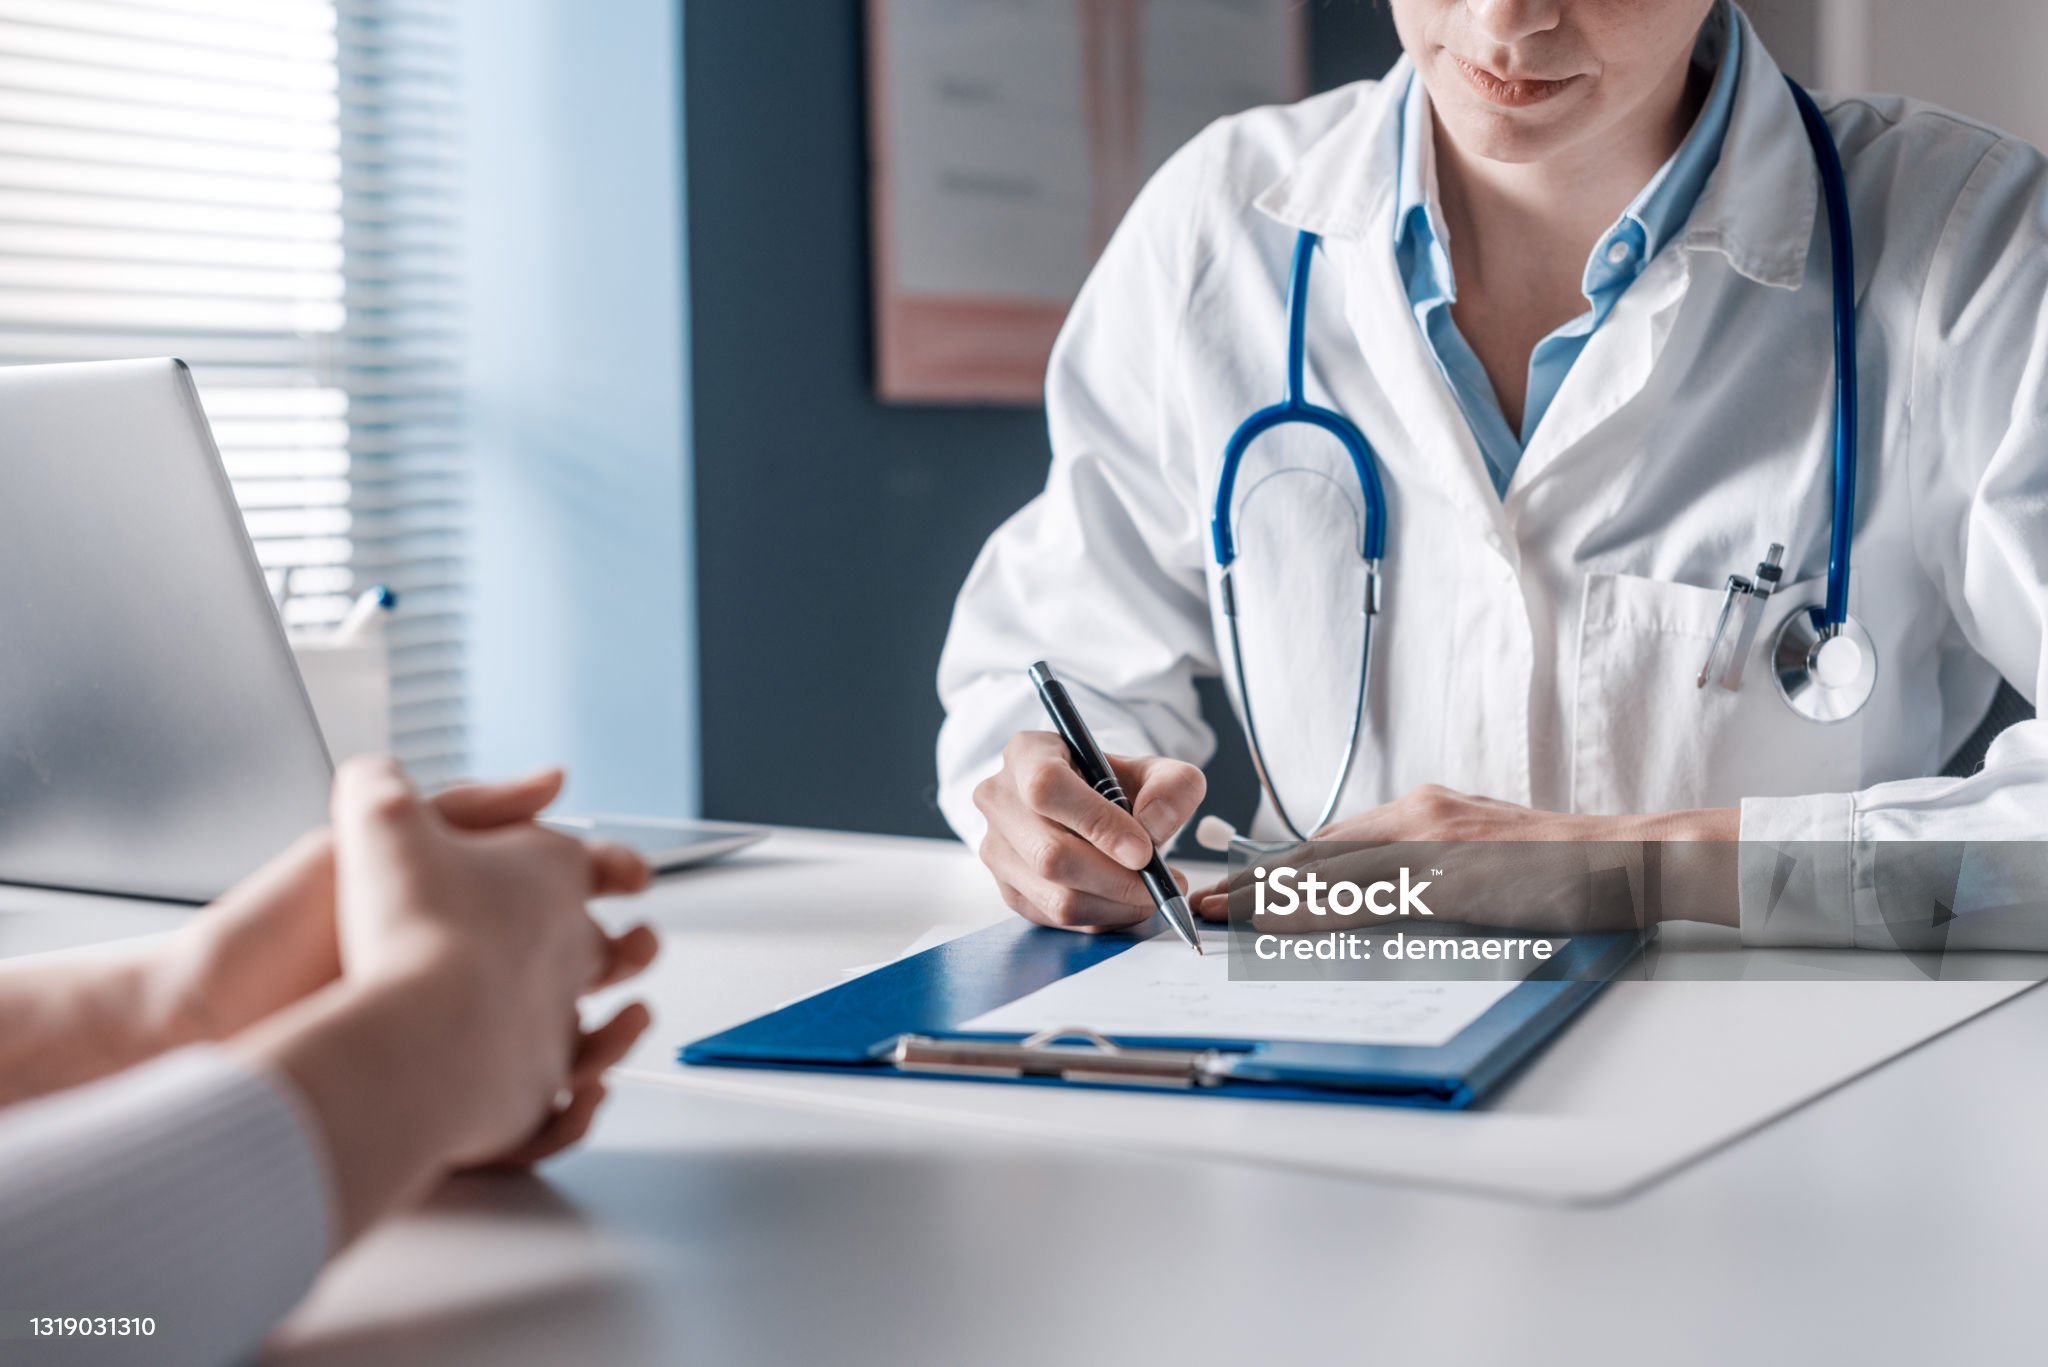

In [2]:
from IPython.display import display ,Image
# image2 :
img2=Image("medical2.jpg")
display(img2)

## Part1 : Analysis 

In [3]:
# imports :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.impute import SimpleImputer
import sqlite3
import re
from IPython.display import display ,Image
from plotly.graph_objs import *
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [4]:
# load the data:

data=pd.read_csv("dataset_.csv")
data.head(25)

age     sex     bmi  children smoker     region  medical charges
0    19  female  27.900         0    yes  southwest      16884.92400
1    18    male  33.770         1     no  southeast       1725.55230
2    28    male  33.000         3     no  southeast       4449.46200
3    33    male  22.705         0     no  northwest      21984.47061
4    32    male  28.880         0     no  northwest       3866.85520
5    31  female  25.740         0     no  southeast       3756.62160
6    46  female  33.440         1     no  southeast       8240.58960
7    37  female  27.740         3     no  northwest       7281.50560
8    37    male  29.830         2     no  northeast       6406.41070
9    60  female  25.840         0     no  northwest      28923.13692
10   25    male  26.220         0     no  northeast       2721.32080
11   62  female  26.290         0    yes  southeast      27808.72510
12   23    male  34.400         0     no  southwest       1826.84300
13   56  female  39.820         0     no  southeast      11090.71780
14   27    male  42.130         0    yes  southeast      39611.75770
15   19    male  24.600         1     no  southwest       1837.23700
16   52  female  30.780         1     no  northeast      10797.33620
17   23    male  23.845         0     no  northeast       2395.17155
18   56    male  40.300         0     no  southwest      10602.38500
19   30    male  35.300         0    yes  southwest      36837.46700
20   60  female  36.005         0     no  northeast      13228.84695
21   30  female  32.400         1     no  southwest       4149.73600
22   18    male  34.100         0     no  southeast       1137.01100
23   34  female  31.920         1    yes  northeast      37701.87680
24   37    male  28.025         2     no  northwest       6203.90175

## Analysis by using pandas :

In [5]:
#get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 7 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   age              1338 non-null   int64  

 1   sex              1338 non-null   object 

 2   bmi              1338 non-null   float64

 3   children         1338 non-null   int64  

 4   smoker           1338 non-null   object 

 5   region           1338 non-null   object 

 6   medical charges  1338 non-null   float64

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB

None

-------------------------

shape of the dataset -->> (1338, 7)


In [6]:
#get the statistical:
data.describe().T

count          mean           std        min         25%  \
age              1338.0     39.207025     14.049960    18.0000    27.00000   
bmi              1338.0     30.663397      6.098187    15.9600    26.29625   
children         1338.0      1.094918      1.205493     0.0000     0.00000   
medical charges  1338.0  13270.422265  12110.011237  1121.8739  4740.28715   

                      50%           75%          max  
age                39.000     51.000000     64.00000  
bmi                30.400     34.693750     53.13000  
children            1.000      2.000000      5.00000  
medical charges  9382.033  16639.912515  63770.42801

In [7]:
# get Types of data:

data.dtypes

age                  int64
sex                 object
bmi                float64
children             int64
smoker              object
region              object
medical charges    float64
dtype: object

In [8]:
#check if there null values in data:
# NO Found any null values :
data.isna().mean()

age                0.0
sex                0.0
bmi                0.0
children           0.0
smoker             0.0
region             0.0
medical charges    0.0
dtype: float64

In [9]:
# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in age -->> 

 age

18    69

19    68

50    29

51    29

47    29

46    29

45    29

20    29

48    29

52    29

22    28

49    28

54    28

53    28

21    28

26    28

24    28

25    28

28    28

27    28

23    28

43    27

29    27

30    27

41    27

42    27

44    27

31    27

40    27

32    26

33    26

56    26

34    26

55    26

57    26

37    25

59    25

58    25

36    25

38    25

35    25

39    25

61    23

60    23

63    23

62    23

64    22

Name: count, dtype: int64

-------------------------

counts of items in sex -->> 

 sex

male      676

female    662

Name: count, dtype: int64

-------------------------

counts of items in bmi -->> 

 bmi

32.300    13

28.310     9

30.495     8

30.875     8

31.350     8

          ..

46.200     1

23.800     1

44.770     1

32.120     1

30.970     1

Name: count, Length: 548, dtype: int64

-------------------------

counts of items in children -->> 

 children

0    574

1    32

In [10]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>age column  :  

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24

 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

**************************************************

All items in the ---->>>sex column  :  

['female' 'male']

**************************************************

All items in the ---->>>bmi column  :  

[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84

 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3

 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3

 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9

 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2

 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335

 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75

 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285

 37.62  41.23  34.8   22.895 31.16  27.2  

In [11]:
# clean the columns of the dataset from precentage sign % or _ if found  :
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

age     sex     bmi  children smoker     region  medicalcharges
0      19  female  27.900         0    yes  southwest     16884.92400
1      18    male  33.770         1     no  southeast      1725.55230
2      28    male  33.000         3     no  southeast      4449.46200
3      33    male  22.705         0     no  northwest     21984.47061
4      32    male  28.880         0     no  northwest      3866.85520
...   ...     ...     ...       ...    ...        ...             ...
1333   50    male  30.970         3     no  northwest     10600.54830
1334   18  female  31.920         0     no  northeast      2205.98080
1335   18  female  36.850         0     no  southeast      1629.83350
1336   21  female  25.800         0     no  southwest      2007.94500
1337   61  female  29.070         0    yes  northwest     29141.36030

[1338 rows x 7 columns]

In [12]:
# cleaning categorical features from the null values if found   :
for col in data.select_dtypes("object").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

age     sex     bmi  children smoker     region  medicalcharges
0      19  female  27.900         0    yes  southwest     16884.92400
1      18    male  33.770         1     no  southeast      1725.55230
2      28    male  33.000         3     no  southeast      4449.46200
3      33    male  22.705         0     no  northwest     21984.47061
4      32    male  28.880         0     no  northwest      3866.85520
...   ...     ...     ...       ...    ...        ...             ...
1333   50    male  30.970         3     no  northwest     10600.54830
1334   18  female  31.920         0     no  northeast      2205.98080
1335   18  female  36.850         0     no  southeast      1629.83350
1336   21  female  25.800         0     no  southwest      2007.94500
1337   61  female  29.070         0    yes  northwest     29141.36030

[1338 rows x 7 columns]

In [13]:
# cleaning Numerical features from the null values if found   :
for col in data.select_dtypes("number").columns:
    # Create an imputer object
    imputer = SimpleImputer(missing_values=np.nan, strategy="median")
    # Fit and transform the column
    imputed_values = imputer.fit_transform(data[col].values.reshape(-1, 1))
    # Squeeze the array to ensure it's 1D
    data[col] = np.squeeze(imputed_values)
data

age     sex     bmi  children smoker     region  medicalcharges
0     19.0  female  27.900       0.0    yes  southwest     16884.92400
1     18.0    male  33.770       1.0     no  southeast      1725.55230
2     28.0    male  33.000       3.0     no  southeast      4449.46200
3     33.0    male  22.705       0.0     no  northwest     21984.47061
4     32.0    male  28.880       0.0     no  northwest      3866.85520
...    ...     ...     ...       ...    ...        ...             ...
1333  50.0    male  30.970       3.0     no  northwest     10600.54830
1334  18.0  female  31.920       0.0     no  northeast      2205.98080
1335  18.0  female  36.850       0.0     no  southeast      1629.83350
1336  21.0  female  25.800       0.0     no  southwest      2007.94500
1337  61.0  female  29.070       0.0    yes  northwest     29141.36030

[1338 rows x 7 columns]

In [14]:
# check agin the null values :
# No Any null values in dataset :
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  medicalcharges
0     False  False  False     False   False   False           False
1     False  False  False     False   False   False           False
2     False  False  False     False   False   False           False
3     False  False  False     False   False   False           False
4     False  False  False     False   False   False           False
...     ...    ...    ...       ...     ...     ...             ...
1333  False  False  False     False   False   False           False
1334  False  False  False     False   False   False           False
1335  False  False  False     False   False   False           False
1336  False  False  False     False   False   False           False
1337  False  False  False     False   False   False           False

[1338 rows x 7 columns]>

## Data Explantory by using pandas :

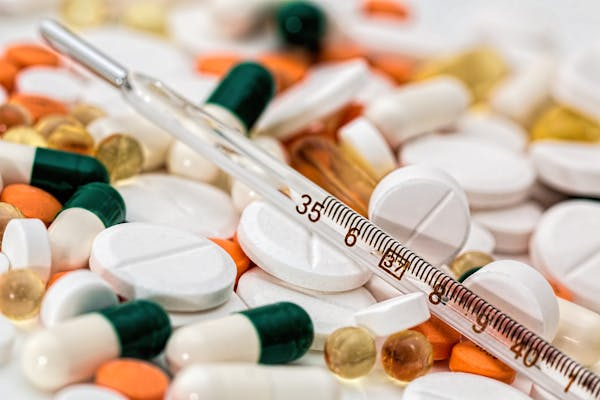

In [15]:
from IPython.display import display ,Image
# image1 :
img1=Image("medical1.jpeg")
display(img1)

In [16]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns

    num_cols=data.select_dtypes("number").columns

    disc_cols=data.select_dtypes(include=("int64")).columns

    conts_cols=data.select_dtypes(include=("float64")).columns

    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['sex', 'smoker', 'region'], dtype='object')

 Numerical_columns ----->>> Index(['age', 'bmi', 'children', 'medicalcharges'], dtype='object') 

 Discrete_columns ---->>> Index([], dtype='object') 

 Continous_cols ----->> Index(['age', 'bmi', 'children', 'medicalcharges'], dtype='object') 

 Nominal Columns --->> sex       2

smoker    2

dtype: int64


In [17]:
# Describe object :
data.describe(include="O").T

count unique        top  freq
sex     1338      2       male   676
smoker  1338      2         no  1064
region  1338      4  southeast   364

## sql Analysis :

In [18]:
# Connect to the database
conn = sqlite3.connect('Medical.db')

# Create a cursor object
cursor = conn.cursor()

# Check if the table 'Student' exists
cursor.execute("""
SELECT * FROM sqlite_master WHERE type='table' AND name='medical1';
""")
table_exists = cursor.fetchone()

# Create the table only if it does not exist
if not table_exists:
    # Assuming 'data' is your pandas DataFrame
    data.to_sql("medical1", conn, if_exists='fail')  # 'fail' will raise a ValueError if the table already exists
else:
    print("The table 'medical' already exists. Skipping table creation.")



The table 'medical' already exists. Skipping table creation.


In [19]:
df1 = pd.read_sql("SELECT * FROM medical1", conn)
df1

index   age     sex     bmi  children smoker     region  medicalcharges
0         0  19.0  female  27.900       0.0    yes  southwest     16884.92400
1         1  18.0    male  33.770       1.0     no  southeast      1725.55230
2         2  28.0    male  33.000       3.0     no  southeast      4449.46200
3         3  33.0    male  22.705       0.0     no  northwest     21984.47061
4         4  32.0    male  28.880       0.0     no  northwest      3866.85520
...     ...   ...     ...     ...       ...    ...        ...             ...
1333   1333  50.0    male  30.970       3.0     no  northwest     10600.54830
1334   1334  18.0  female  31.920       0.0     no  northeast      2205.98080
1335   1335  18.0  female  36.850       0.0     no  southeast      1629.83350
1336   1336  21.0  female  25.800       0.0     no  southwest      2007.94500
1337   1337  61.0  female  29.070       0.0    yes  northwest     29141.36030

[1338 rows x 8 columns]

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 8 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   index           1338 non-null   int64  

 1   age             1338 non-null   float64

 2   sex             1338 non-null   object 

 3   bmi             1338 non-null   float64

 4   children        1338 non-null   float64

 5   smoker          1338 non-null   object 

 6   region          1338 non-null   object 

 7   medicalcharges  1338 non-null   float64

dtypes: float64(4), int64(1), object(3)

memory usage: 83.8+ KB


In [21]:
df1.describe().T

count          mean           std        min         25%  \
index           1338.0    668.500000    386.391641     0.0000   334.25000   
age             1338.0     39.207025     14.049960    18.0000    27.00000   
bmi             1338.0     30.663397      6.098187    15.9600    26.29625   
children        1338.0      1.094918      1.205493     0.0000     0.00000   
medicalcharges  1338.0  13270.422265  12110.011237  1121.8739  4740.28715   

                     50%           75%          max  
index            668.500   1002.750000   1337.00000  
age               39.000     51.000000     64.00000  
bmi               30.400     34.693750     53.13000  
children           1.000      2.000000      5.00000  
medicalcharges  9382.033  16639.912515  63770.42801

In [22]:
# check null_values :
df1.isna().sum()

index             0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
medicalcharges    0
dtype: int64

In [23]:
# cleaning : index column is not useful for that i will drop it :

df1=df1.drop(columns="index",axis=1)
df1

age     sex     bmi  children smoker     region  medicalcharges
0     19.0  female  27.900       0.0    yes  southwest     16884.92400
1     18.0    male  33.770       1.0     no  southeast      1725.55230
2     28.0    male  33.000       3.0     no  southeast      4449.46200
3     33.0    male  22.705       0.0     no  northwest     21984.47061
4     32.0    male  28.880       0.0     no  northwest      3866.85520
...    ...     ...     ...       ...    ...        ...             ...
1333  50.0    male  30.970       3.0     no  northwest     10600.54830
1334  18.0  female  31.920       0.0     no  northeast      2205.98080
1335  18.0  female  36.850       0.0     no  southeast      1629.83350
1336  21.0  female  25.800       0.0     no  southwest      2007.94500
1337  61.0  female  29.070       0.0    yes  northwest     29141.36030

[1338 rows x 7 columns]

## Data Explantory by using sqlite3:

In [24]:
# Q1 : How many of mens whose smoking :
R1=cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1  WHERE   SEX='male' AND SMOKER='yes'")
print("Number of mens whose smoking =",R1.fetchall())
# Q1 : How many of mens that not smoking: 
R2=cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1  WHERE   SEX='male' AND SMOKER='no'")
print("Number of mens whose Not smoking =",R2.fetchall())


Number of mens whose smoking = [(159,)]

Number of mens whose Not smoking = [(517,)]


In [25]:
# Q2 : How many of ladies whose smoking :
R3=cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1  WHERE   SEX='female' AND SMOKER='yes'")
print("Number of ladies whose smoking =",R3.fetchall())
# Q2 : How many of ladies that not smoking: 
R4=cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1  WHERE   SEX='female' AND SMOKER='no'")
print("Number of ladies whose Not smoking =",R4.fetchall())


Number of ladies whose smoking = [(115,)]

Number of ladies whose Not smoking = [(547,)]


In [26]:
# Q3: How many of smokers that come from southwest region and age >50 years :

R5 = cursor.execute("SELECT COUNT(SMOKER) FROM MEDICAL1 WHERE REGION='southwest' AND AGE >50 AND SMOKER='yes'")
print("Number of smokers whose come from southwest region & their Ages bigger that 50 years ",R5.fetchall())

# Q3: How many of not smoking that come from northwest region and age >20 years :
R6 = cursor.execute("SELECT COUNT(SMOKER) FROM MEDICAL1 WHERE REGION='northwest' AND AGE >20 AND SMOKER='no'")
print("Number of pepole that comeing from northwest REGION , Not Smoking and their Ages bigger than 20 years ",R6.fetchall())


Number of smokers whose come from southwest region & their Ages bigger that 50 years  [(8,)]

Number of pepole that comeing from northwest REGION , Not Smoking and their Ages bigger than 20 years  [(237,)]


In [27]:
# Q4: How many men whose medical charges are the max and who are smokers from the southeast region?
R7 = cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1 WHERE REGION='southeast' AND SMOKER ='yes' AND SEX='male' AND MEDICALCHARGES=(SELECT MAX(MEDICALCHARGES) FROM MEDICAL1 WHERE SEX='male')")
print("Number of men that are smokers, come from the southeast region, and have the max medical charges:", R7.fetchall())

# Q4 :How many womens whose medical charges are the max and who are smokers from the southeast region?
R8 = cursor.execute("SELECT COUNT(SEX) FROM MEDICAL1 WHERE REGION='southeast' AND SMOKER ='yes' AND SEX='femal' AND MEDICALCHARGES=(SELECT MAX(MEDICALCHARGES) FROM MEDICAL1 WHERE SEX='femal')")
print("Number of ladies that are smokers, come from the southeast region, and have the max medical charges:", R8.fetchall())



Number of men that are smokers, come from the southeast region, and have the max medical charges: [(1,)]

Number of ladies that are smokers, come from the southeast region, and have the max medical charges: [(0,)]


In [28]:
#Q5:Detect Max,MIN for bmi for mens:

R9=cursor.execute("SELECT MAX(BMI) , MIN(BMI) FROM MEDICAL WHERE SEX='male'")
print("Max BMI & Min BMI For Mens",R9.fetchall())

#Q5:Detect Max,MIN for bmi for ladies:

R10=cursor.execute("SELECT MAX(BMI) , MIN(BMI) FROM MEDICAL WHERE SEX='female'")
print("Max BMI & Min BMI For Ladies",R10.fetchall())

Max BMI & Min BMI For Mens [(53.13, 15.96)]

Max BMI & Min BMI For Ladies [(48.07, 16.815)]


## Visualization the Dataset

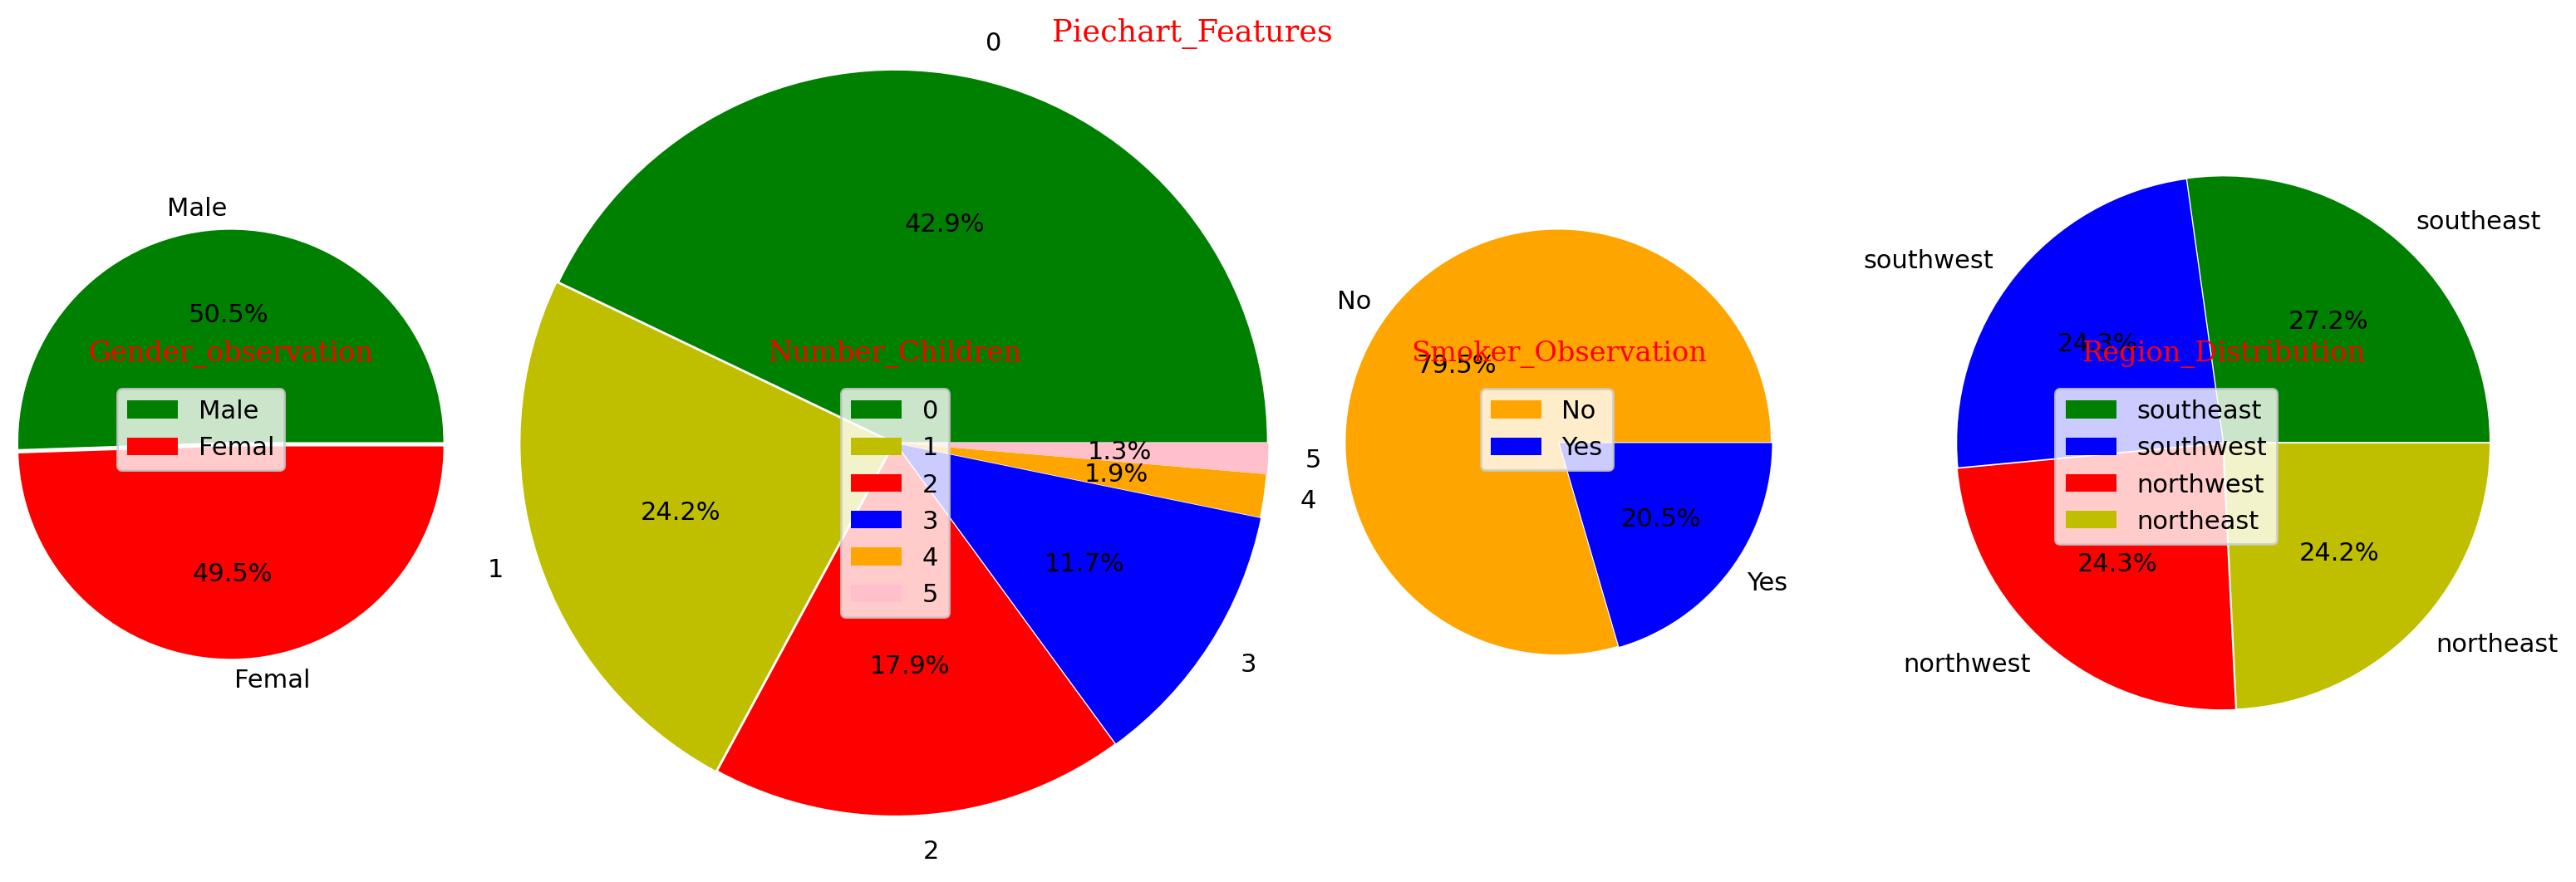

In [29]:
# Font style for titles
f1 = {"family": "serif", "size": 11, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 15), dpi=220)
plt.suptitle("Piechart_Features",fontdict=f1)

# Plot 1
Gender = data["sex"].value_counts()
plt.subplot(4, 4, 1)  # Create the first subplot
plt.title("Gender_observation", fontdict=f1)
plt.pie(
    x=Gender,
    labels=["Male", "Femal"],
    colors=["g","r"],
    explode=[0.01, 0.07],
    autopct='%1.1f%%',
    radius=4,
)

plt.legend()


# Plot 2

children = data["children"].value_counts()
plt.subplot(4, 4, 2)  # Create the second subplot
plt.title("Number_Children", fontdict=f1)
plt.pie(
    x=children,
    labels=['0','1','2','3','4','5'],
    colors=["g","y","r","b","orange","pink"],
    explode=[0.01, 0.05,0.02,0.03,0.01,0.03],
    autopct='%1.1f%%',
    radius=7,
)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)


#plot3:

# to observe how many of the smokers :

plt.subplot(4,4,3)
smoker=data["smoker"].value_counts()
plt.pie(x=smoker,labels=["No","Yes"],colors=["orange","b"],explode=[0.02,0.01],autopct='%1.1f%%',radius=4)
plt.title("Smoker_Observation",fontdict=f1)
plt.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)


#plot4:

# to observe how many of the region :

plt.subplot(4,4,4)
region=data["region"].value_counts()
plt.pie(x=region,labels=["southeast","southwest","northwest","northeast"],colors=["g","b","r","y"],explode=[0.02,0.01,0.03,0.02],autopct='%1.1f%%',radius=5)
plt.title("Region_Distribution",fontdict=f1)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=4,hspace=1)

plt.show()


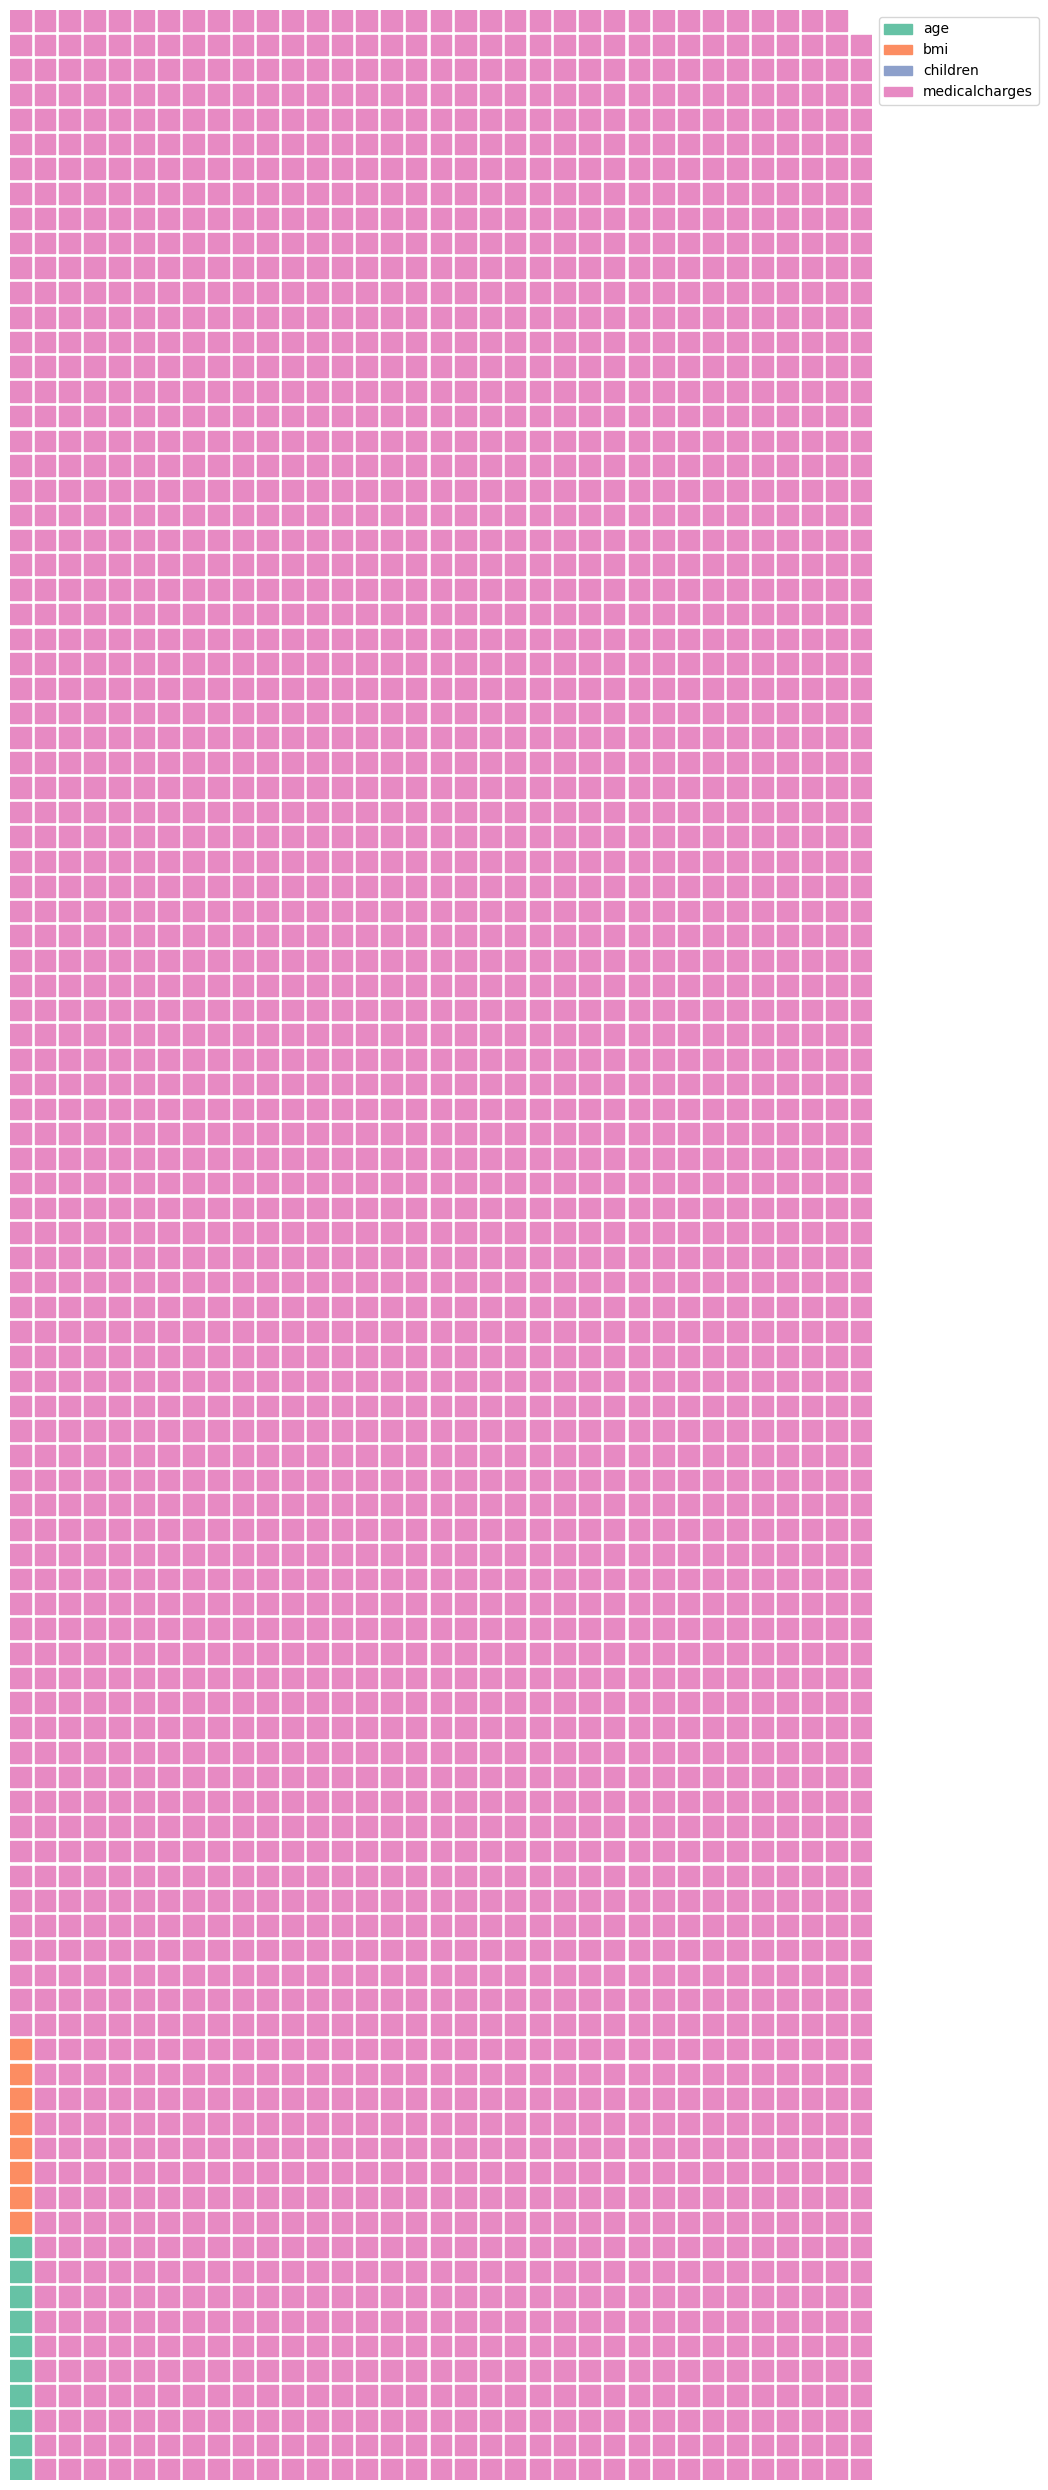

In [30]:
# Make a waffel for the Data:
# from this waffle i see which Feature is a controled on other features : (Target_Feature)

from pywaffle import Waffle

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
values = data[numeric_columns].sum().tolist()

fig = plt.figure(
    FigureClass=Waffle,
    rows=100,
    columns=35,
    values=values,
    legend={'labels': numeric_columns.tolist(),
            'loc': "upper left",
            'bbox_to_anchor': (1, 1)},
    figsize=(25, 25)
)
plt.show()

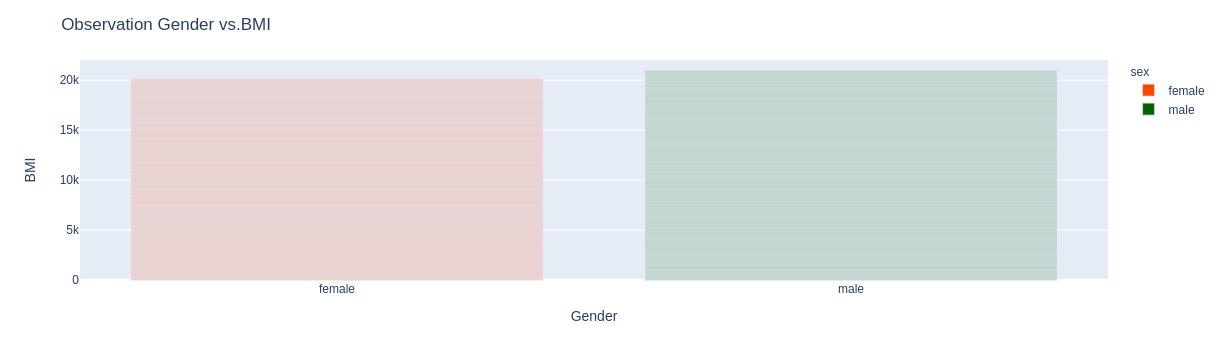

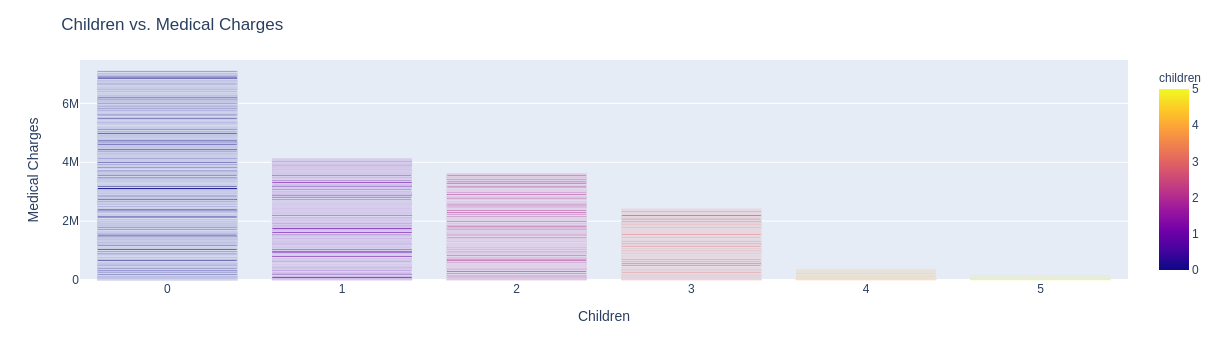

In [31]:
# Custom color palette
color_palette = ['#FF4500', '#006400']

# create barplot Gender.vs BMI :

# Create a bar plot using plotly.graph_objects
fig = px.bar(data, x='sex', y='bmi', color='sex', color_discrete_sequence=color_palette)

# Update the layout
fig.update_layout(title="Observation Gender vs.BMI", xaxis_title="Gender", yaxis_title="BMI")

# Show the figure
fig.show()


#Create barplot children vs. medical charges

color_palette1 = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']

fig = px.bar(data, x='children', y='medicalcharges', color='children', color_discrete_sequence=color_palette1)

fig.update_layout(title="Children vs. Medical Charges", xaxis_title="Children", yaxis_title="Medical Charges")

fig.show()




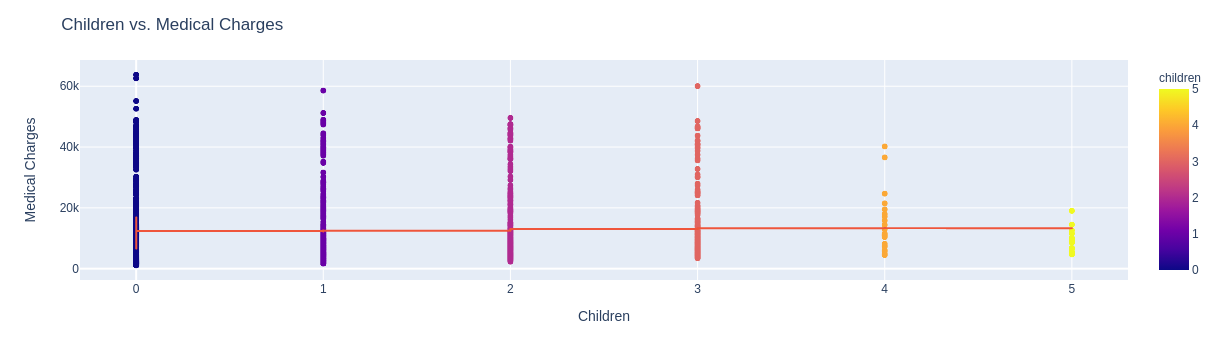

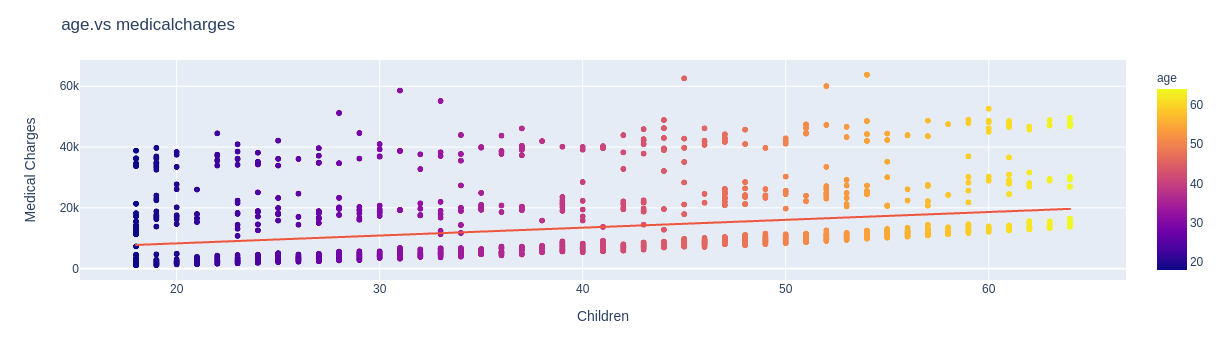

In [32]:
# trendline take : 'lowess', 'rolling', 'ewm', 'expanding', 'ols'

#Create scatter children vs. medical charges

# Custom color palette
color_palette1 = ['#8B008B', '#1E90FF', '#FF6347', '#B22222', '#228B22', '#2F4F4F']

fig = px.scatter(data, x='children', y='medicalcharges', color='children', color_discrete_sequence=color_palette1, trendline='expanding')

fig.update_layout(title="Children vs. Medical Charges", xaxis_title="Children", yaxis_title="Medical Charges")

fig.show()


# Crete Scatter age.vs medicalcharges :

fig = px.scatter(data, x='age', y='medicalcharges', color='age', color_discrete_sequence=color_palette1, trendline='ols')

fig.update_layout(title="age.vs medicalcharges", xaxis_title="Children", yaxis_title="Medical Charges")

fig.show()


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'medicalcharges'}>]], dtype=object)

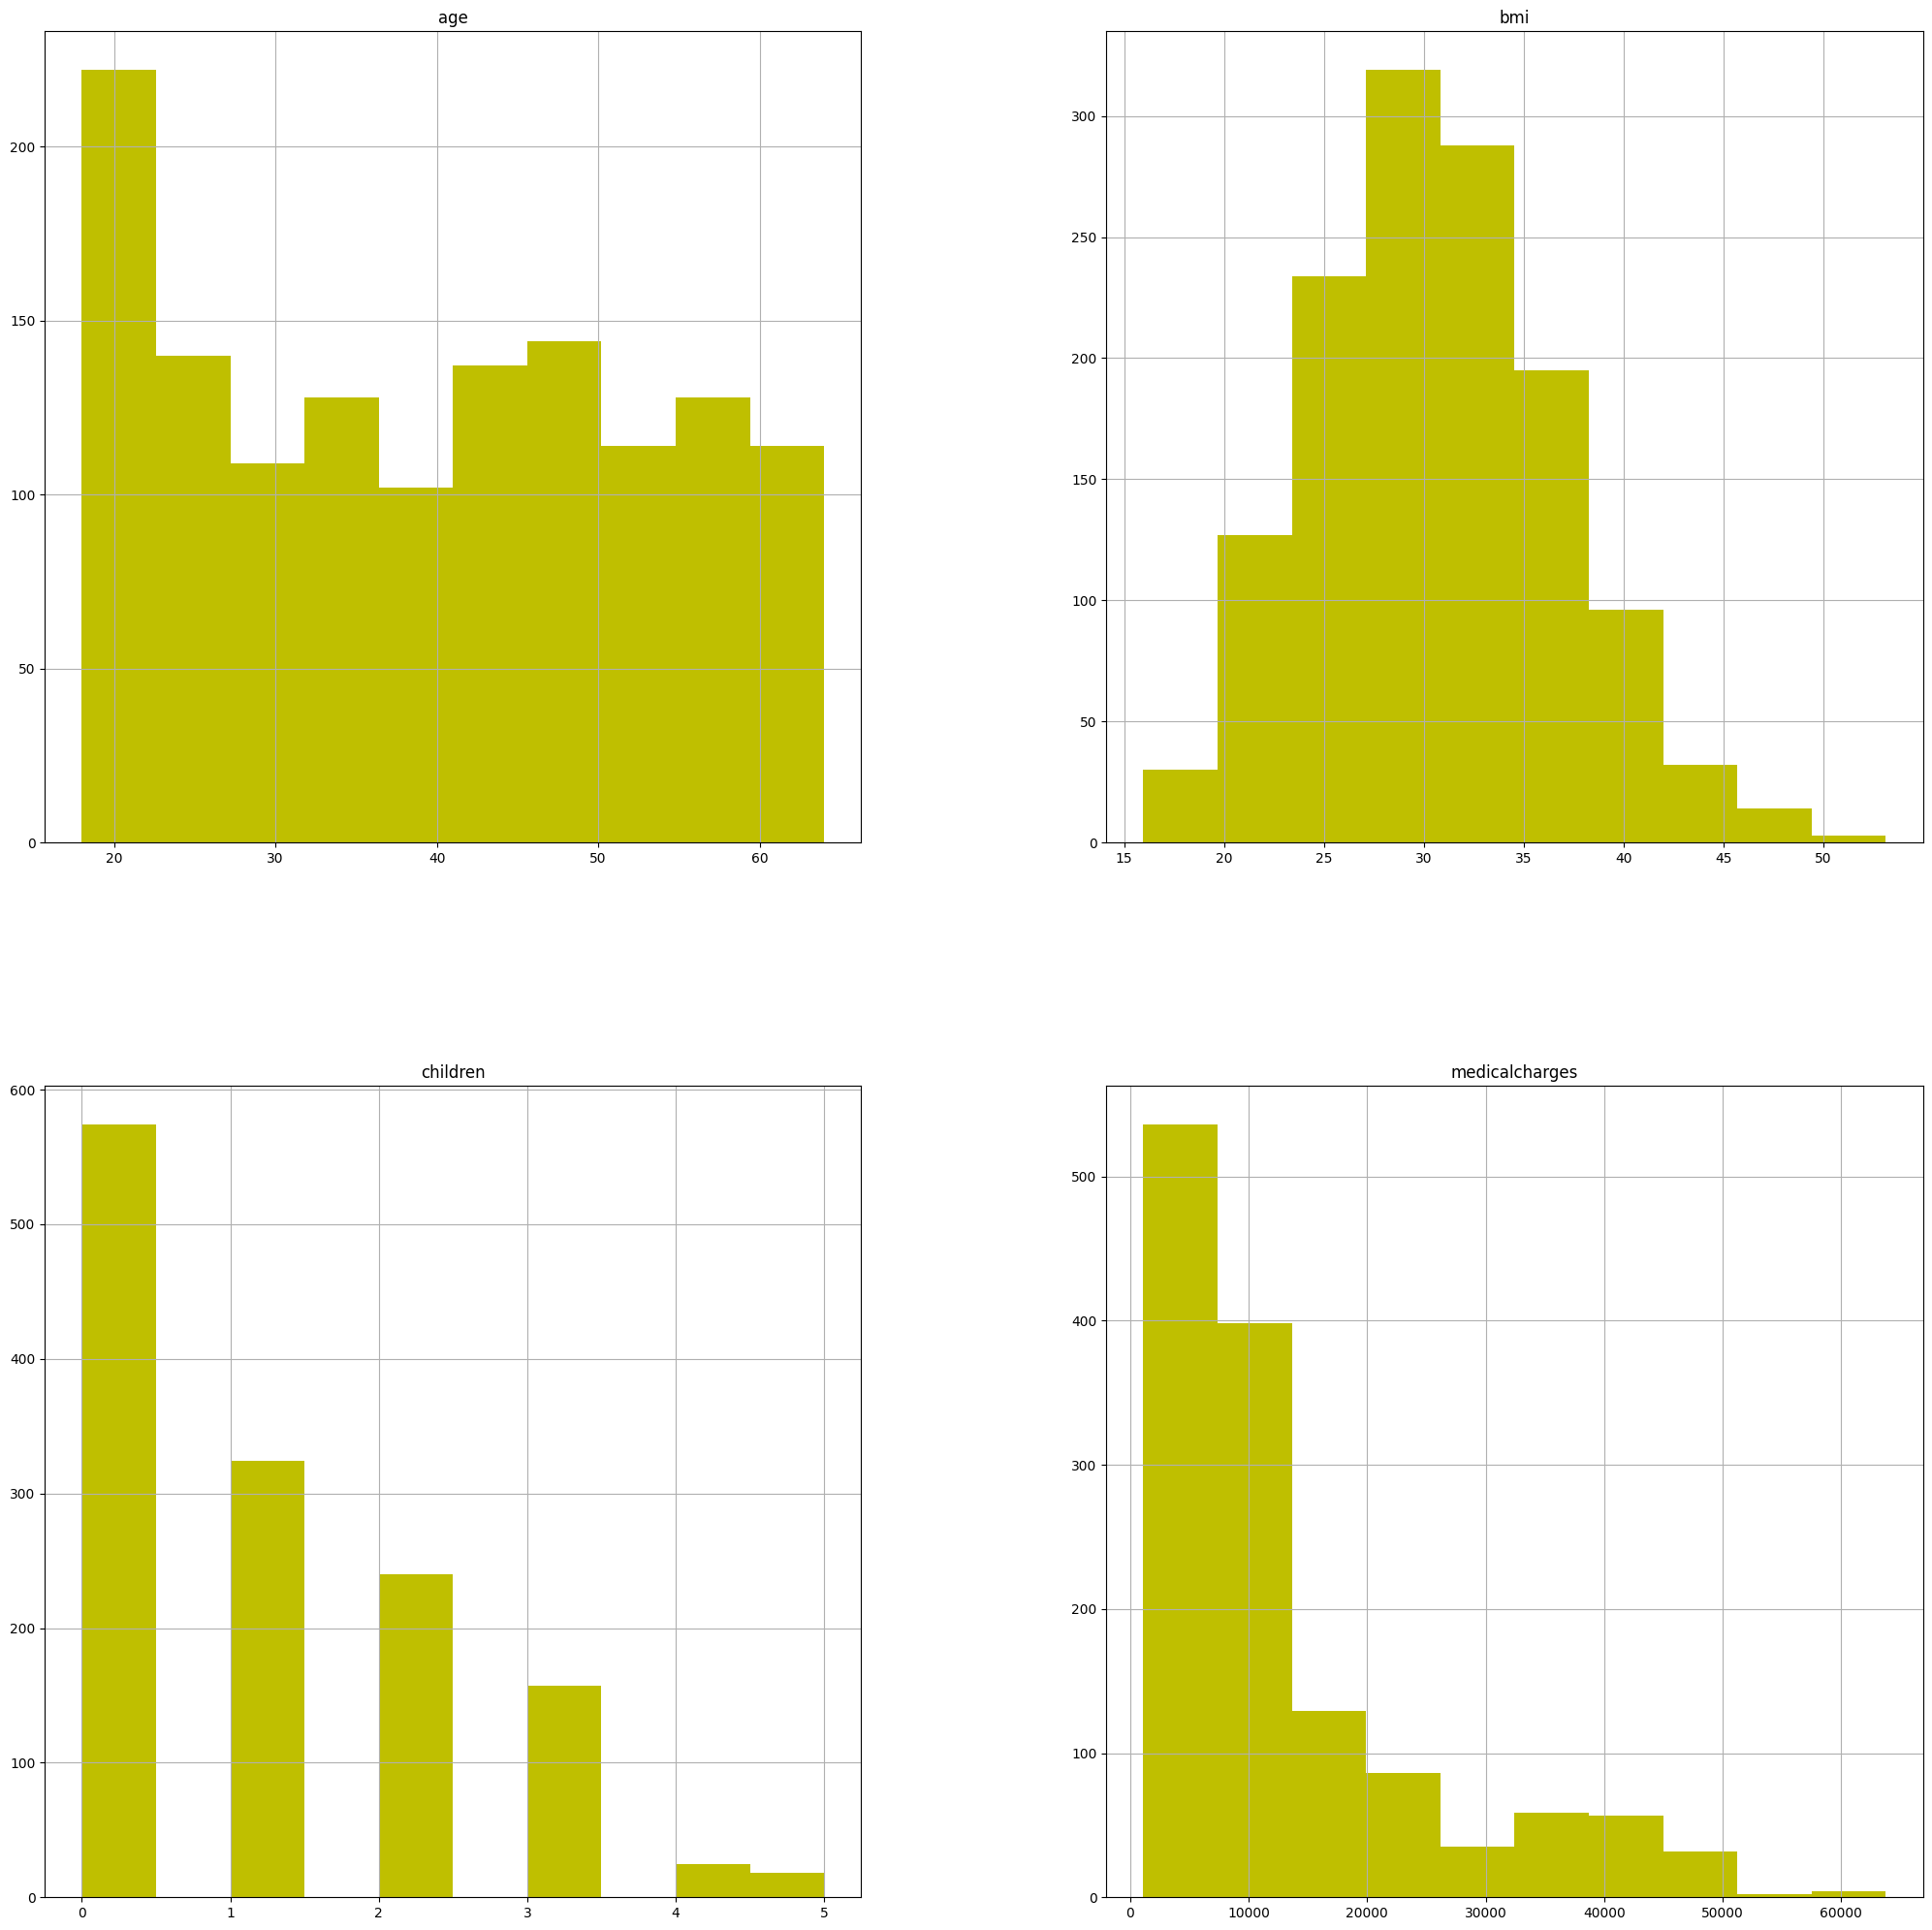

In [33]:
# plot the histgram:
data.hist(figsize=(25,25),color="y")

<Figure size 3600x3000 with 0 Axes>

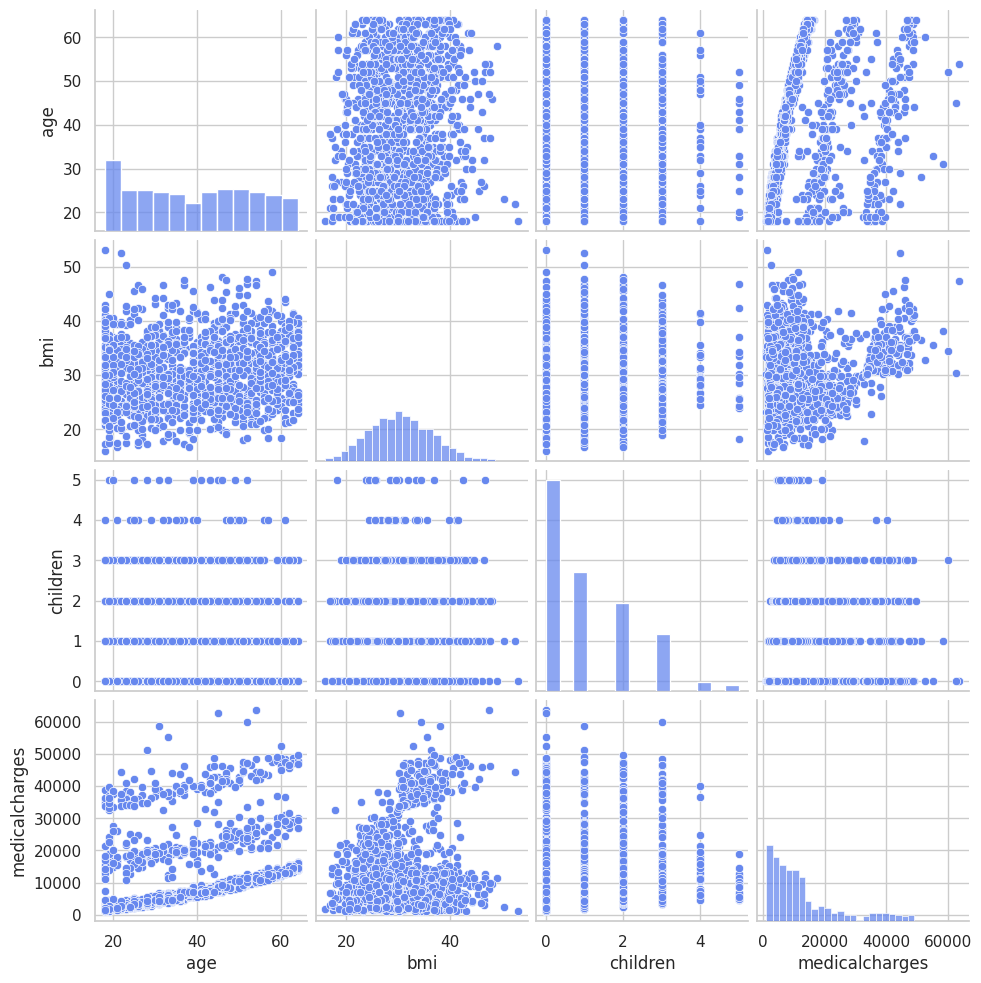

In [34]:
# observe for the float_data
plt.figure(figsize=(30, 25), dpi=120)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'))

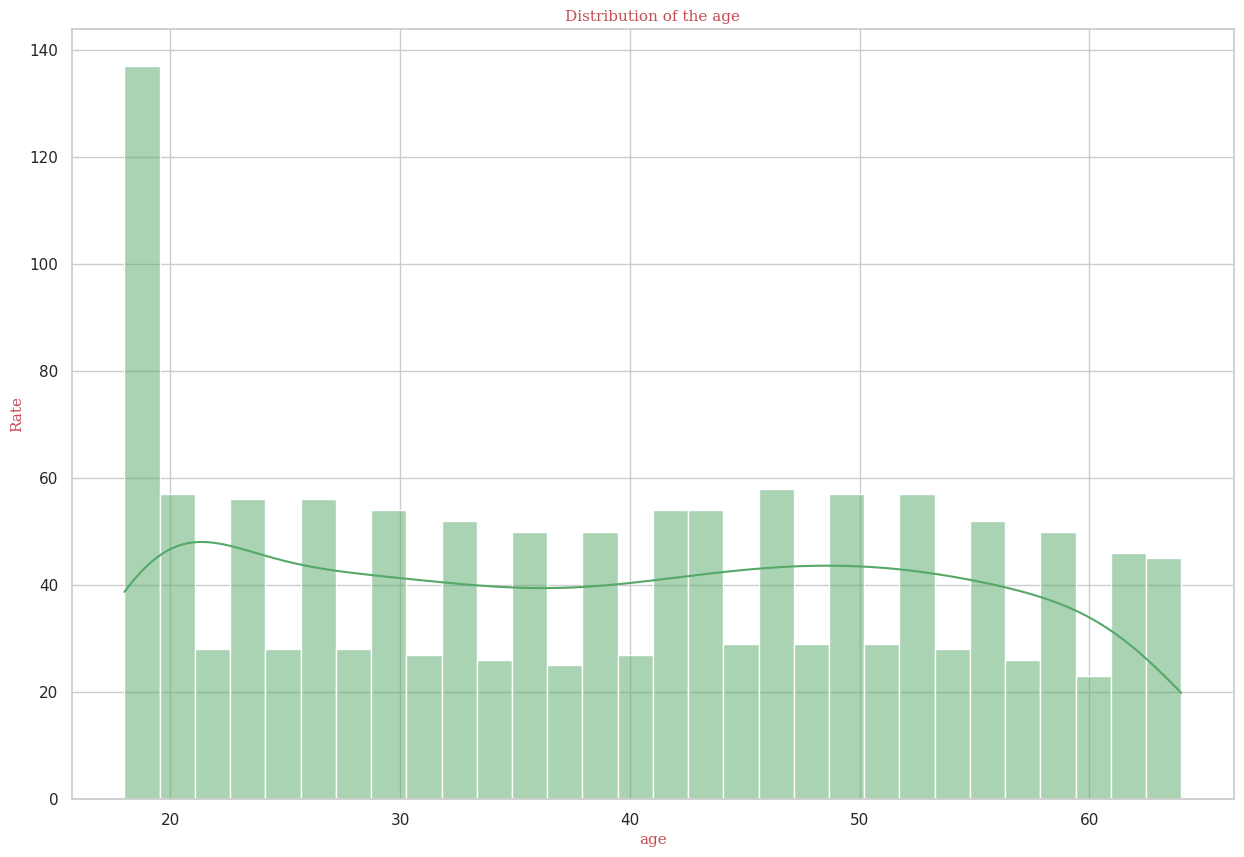

In [35]:
#observe the age distribution:

plt.figure(figsize=(15,10))
plt.title("Distribution of the age",fontdict=f1)
plt.xlabel("age",fontdict=f1)
plt.ylabel("Rate",fontdict=f1)
sns.histplot(data["age"],color="g",bins=30,kde=True,label="age")
plt.show()

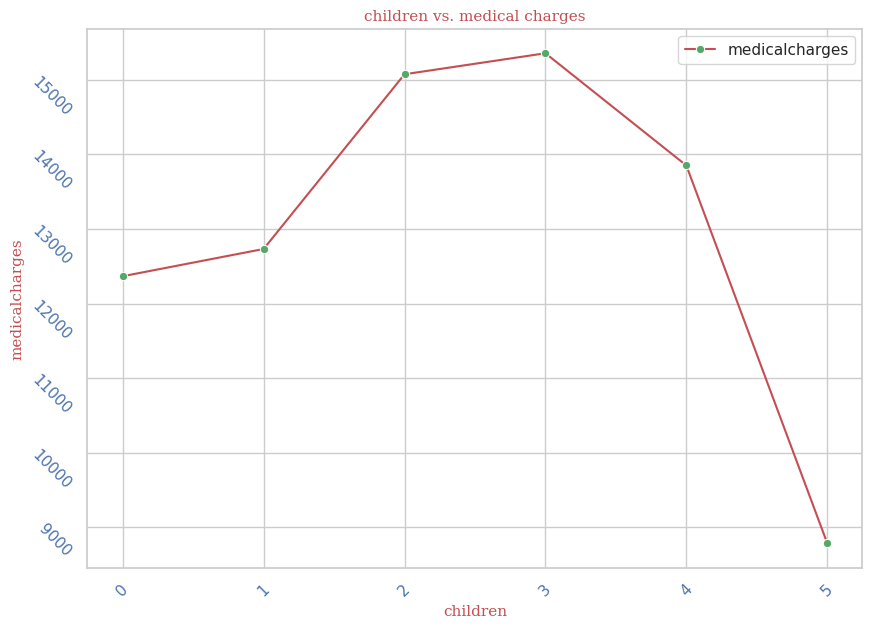

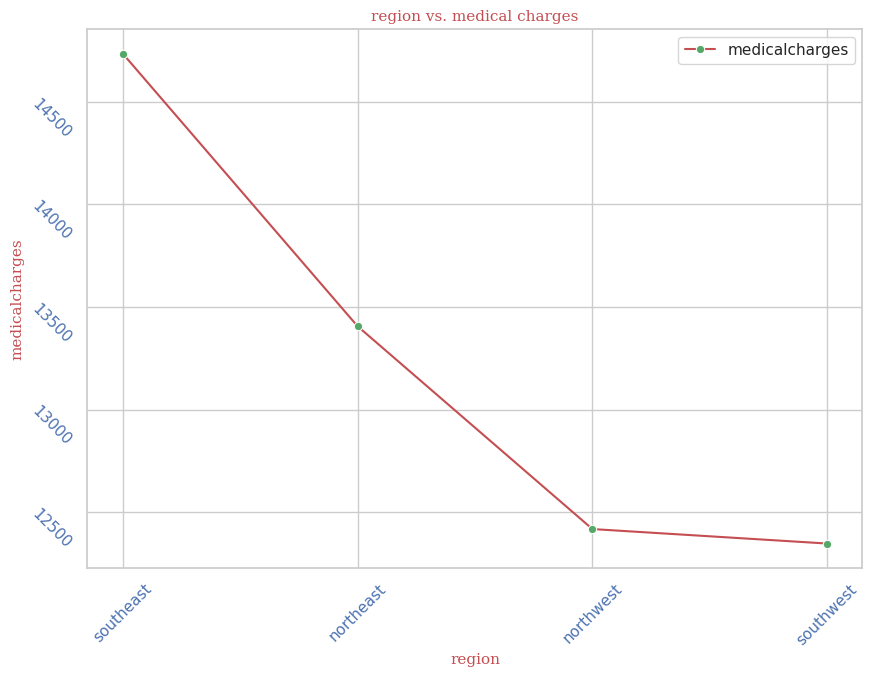

In [36]:
#Lineplot 1 :

plt.figure(figsize=(10,7))
plt.title("children vs. medical charges",fontdict=f1)

top4=data.groupby("children")["medicalcharges"].mean().sort_values(ascending=False)
sns.lineplot(x=top4.index,y=top4.values,color="r",label="medicalcharges",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("children",fontdict=f1)
plt.ylabel("medicalcharges",fontdict=f1)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()


#Lineplot2 :

plt.figure(figsize=(10,7))
plt.title("region vs. medical charges",fontdict=f1)

top5=data.groupby("region")["medicalcharges"].mean().sort_values(ascending=False)
sns.lineplot(x=top5.index,y=top5.values,color="r",label="medicalcharges",marker="o",mfc="g")

plt.xticks(rotation=45,color="b")
plt.xlabel("region",fontdict=f1)
plt.ylabel("medicalcharges",fontdict=f1)
plt.yticks(rotation=-45,color="b")
plt.grid(True)
plt.show()




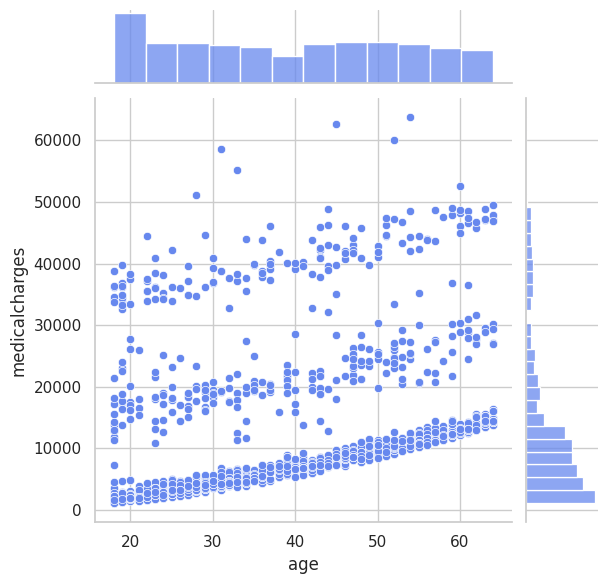

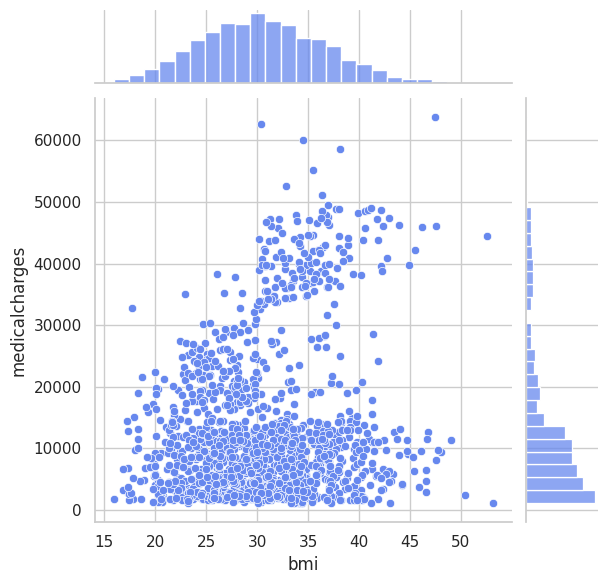

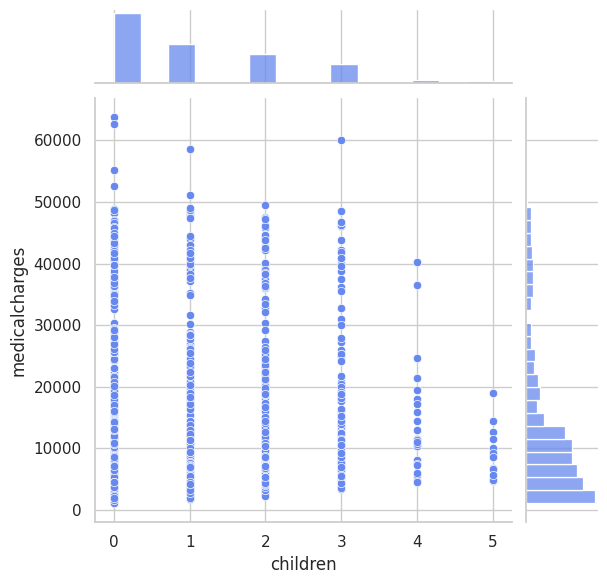

In [37]:
for col in data.select_dtypes("number"):
    if col !="medicalcharges":
       with sns.axes_style("white"):
          sns.set(style="whitegrid")  # Set the plot style
          sns.set_palette("coolwarm")    # Set the color palette
          sns.jointplot(x=data[col],y=data["medicalcharges"],kind="scatter")

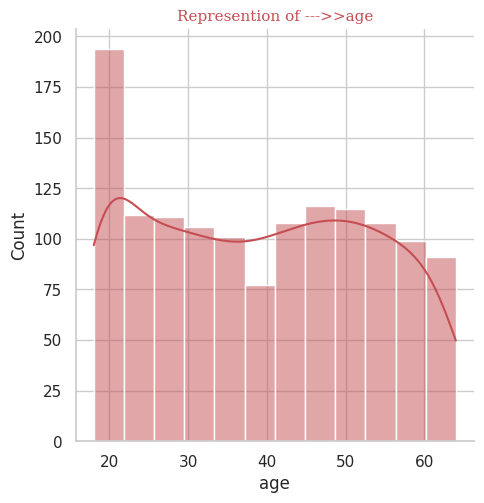

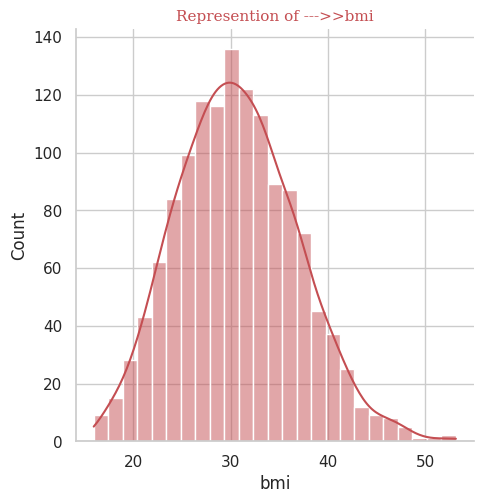

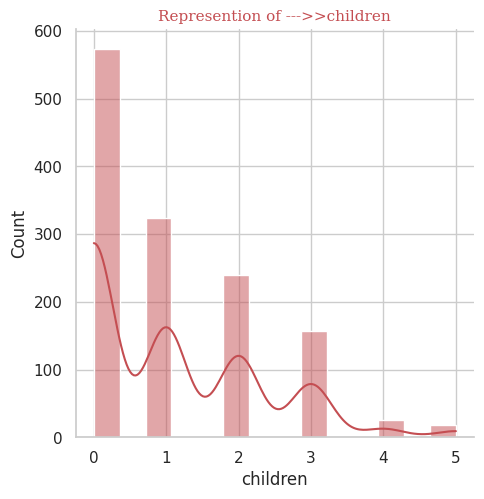

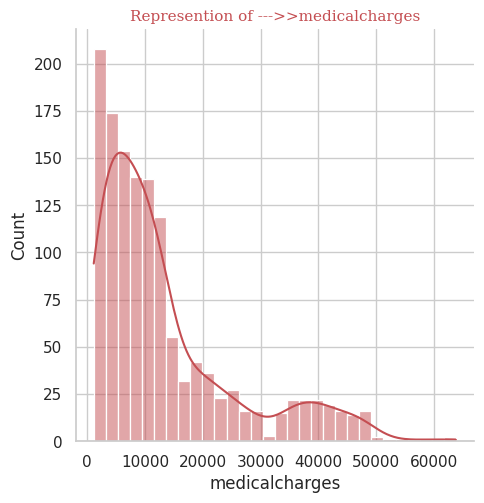

In [38]:
for col in data.select_dtypes("number").columns:
    sns.displot(data[col],kde=True,color="r",label=col)
    sns.set(style="whitegrid")  # Set the plot style
    sns.set_palette("coolwarm")    # Set the color palette
    plt.title("Represention of --->>"+col,fontdict=f1)

## Data processing and Training :(convert Categorical , Labelencoder,StandardScaler,training the data ,split it)

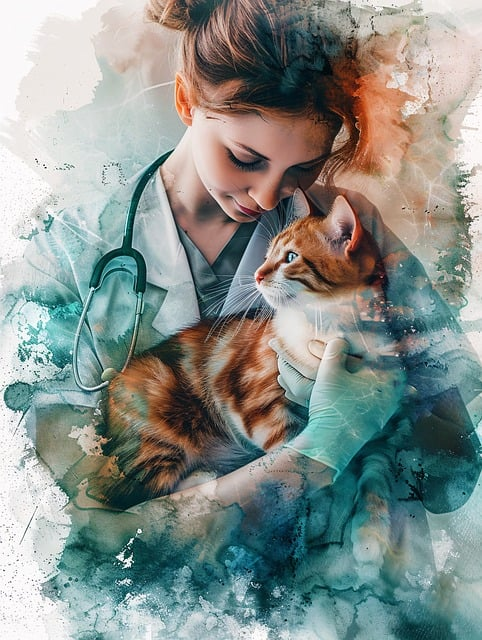

In [39]:
from IPython.display import display ,Image
# image3 :
img3=Image("medical4.jpg")
display(img3)

In [40]:
# convert Categorical into Numerical :
# Convert all Categorical columns into Numerical columns :
label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

age  sex  bmi  children  smoker  region  medicalcharges
0       1    0  197         0       1       3            1005
1       0    1  350         1       0       2              57
2      10    1  331         3       0       2             306
3      15    1   73         0       0       1            1097
4      14    1  223         0       0       1             254
...   ...  ...  ...       ...     ...     ...             ...
1333   32    1  276         3       0       1             746
1334    0    0  302         0       0       0             118
1335    0    0  422         0       0       2              32
1336    3    0  146         0       0       3              91
1337   43    0  229         0       1       1            1171

[1338 rows x 7 columns]

In [41]:
# selecting numerical features :
numerical_features = data.select_dtypes(include=['number'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Create a DataFrame from the scaled numerical features
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

scaled_numerical_df

age       sex       bmi  children    smoker    region  \
0    -1.438764 -1.010519 -0.502469 -0.908614  1.970587  1.343905   
1    -1.509965  0.989591  0.610508 -0.078767 -0.507463  0.438495   
2    -0.797954  0.989591  0.472295  1.580926 -0.507463  0.438495   
3    -0.441948  0.989591 -1.404489 -0.908614 -0.507463 -0.466915   
4    -0.513149  0.989591 -0.313336 -0.908614 -0.507463 -0.466915   
...        ...       ...       ...       ...       ...       ...   
1333  0.768473  0.989591  0.072205  1.580926 -0.507463 -0.466915   
1334 -1.509965 -1.010519  0.261339 -0.908614 -0.507463 -1.372326   
1335 -1.509965 -1.010519  1.134261 -0.908614 -0.507463  0.438495   
1336 -1.296362 -1.010519 -0.873461 -0.908614 -0.507463  1.343905   
1337  1.551686 -1.010519 -0.269689 -0.908614  1.970587 -0.466915   

      medicalcharges  
0           0.873830  
1          -1.580891  
2          -0.936138  
3           1.112052  
4          -1.070785  
...              ...  
1333        0.203184  
1334       -1.422939  
1335       -1.645625  
1336       -1.492852  
1337        1.303666  

[1338 rows x 7 columns]

In [42]:
# split the data into Target & the other data:

x=data.drop(columns="medicalcharges",axis=1)
y=data["medicalcharges"]

print(np.shape(x),np.shape(y))

(1338, 6) (1338,)


In [43]:
# train the data:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(y_test))


(936, 6) (402, 6)

(936,) (402,)


## Explantory on Dataset: (correlations , outliers ,Anova ,heatmap) :

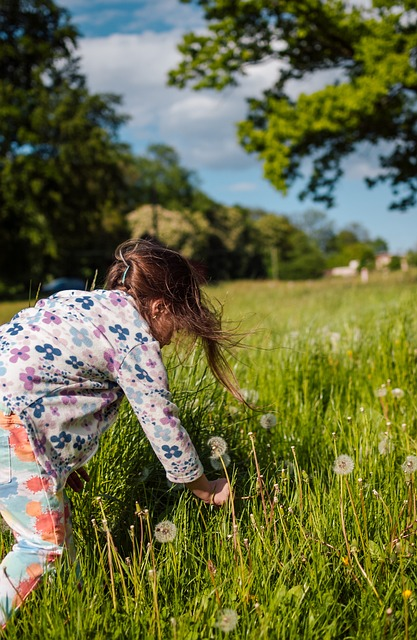

In [44]:
from IPython.display import display ,Image
# image4 :
img4=Image("medical5.jpg")
display(img4)

In [45]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [46]:
class Var_Selector(BaseEstimator,TransformerMixin):

    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])

        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)

        # remove high-low cardinality categorical:-

        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index

        return data.drop(columns=removed_cols)


In [47]:
transform=Var_Selector(data)
transform.fit_transform(data)


age  sex  bmi  children  smoker  region  medicalcharges
0       1    0  197         0       1       3            1005
1       0    1  350         1       0       2              57
2      10    1  331         3       0       2             306
3      15    1   73         0       0       1            1097
4      14    1  223         0       0       1             254
...   ...  ...  ...       ...     ...     ...             ...
1333   32    1  276         3       0       1             746
1334    0    0  302         0       0       0             118
1335    0    0  422         0       0       2              32
1336    3    0  146         0       0       3              91
1337   43    0  229         0       1       1            1171

[1338 rows x 7 columns]

In [48]:
# Check if there are aduplicated values in the data & drop it if found :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)
df = df.drop_duplicates()
duplicated_features=df.duplicated().sum()
print("Number of duplicates of cleaning it ----->>> ",duplicated_features)

Number of duplicates ----->>>  1

Number of duplicates of cleaning it ----->>>  0


In [49]:
# Calculate the correlation :

corr=data.select_dtypes("number").corr()
corr

age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.112052  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.044714  0.017163  0.076185  0.004588   
bmi             0.112052  0.044714  1.000000  0.011228  0.002085  0.155176   
children        0.042469  0.017163  0.011228  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.002085  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.155176  0.016569 -0.002181  1.000000   
medicalcharges  0.534522  0.009533  0.119902  0.126132  0.663509 -0.043780   

                medicalcharges  
age                   0.534522  
sex                   0.009533  
bmi                   0.119902  
children              0.126132  
smoker                0.663509  
region               -0.043780  
medicalcharges        1.000000

In [50]:
# Calculate Spearman Correlation:
sperman=data.select_dtypes("number").corr(method="spearman")
sperman


age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020809  0.107736  0.056992 -0.025210  0.004315   
sex            -0.020809  1.000000  0.044802  0.015589  0.076185  0.004614   
bmi             0.107736  0.044802  1.000000  0.015607  0.002203  0.152959   
children        0.056992  0.015589  0.015607  1.000000  0.016583  0.010604   
smoker         -0.025210  0.076185  0.002203  0.016583  1.000000 -0.002155   
region          0.004315  0.004614  0.152959  0.010604 -0.002155  1.000000   
medicalcharges  0.534392  0.009490  0.119396  0.133339  0.663460 -0.043531   

                medicalcharges  
age                   0.534392  
sex                   0.009490  
bmi                   0.119396  
children              0.133339  
smoker                0.663460  
region               -0.043531  
medicalcharges        1.000000

In [51]:
# Calculate pearson Correlation:
pearson=data.select_dtypes("number").corr(method="pearson")
pearson


age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.112052  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.044714  0.017163  0.076185  0.004588   
bmi             0.112052  0.044714  1.000000  0.011228  0.002085  0.155176   
children        0.042469  0.017163  0.011228  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.002085  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.155176  0.016569 -0.002181  1.000000   
medicalcharges  0.534522  0.009533  0.119902  0.126132  0.663509 -0.043780   

                medicalcharges  
age                   0.534522  
sex                   0.009533  
bmi                   0.119902  
children              0.126132  
smoker                0.663509  
region               -0.043780  
medicalcharges        1.000000

In [52]:
# Calculate Kendall Correlation:
kendall=data.select_dtypes("number").corr(method="kendall")
kendall


age       sex       bmi  children    smoker    region  \
age             1.000000 -0.017186  0.073273  0.043253 -0.020821  0.003272   
sex            -0.017186  1.000000  0.036630  0.014317  0.076185  0.004213   
bmi             0.073273  0.036630  1.000000  0.011562  0.001801  0.114214   
children        0.043253  0.014317  0.011562  1.000000  0.015231  0.008693   
smoker         -0.020821  0.076185  0.001801  0.015231  1.000000 -0.001967   
region          0.003272  0.004213  0.114214  0.008693 -0.001967  1.000000   
medicalcharges  0.475302  0.007751  0.082524  0.103107  0.541916 -0.032112   

                medicalcharges  
age                   0.475302  
sex                   0.007751  
bmi                   0.082524  
children              0.103107  
smoker                0.541916  
region               -0.032112  
medicalcharges        1.000000

(0.0, 574.35)

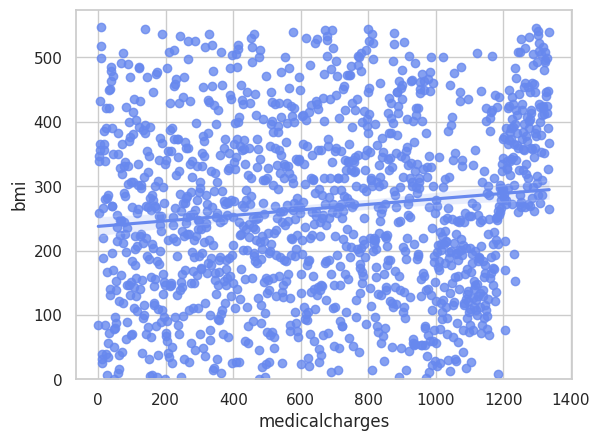

In [53]:
# Type of Relation between bmi & medicalcharges :Positve_Relation
sns.regplot(x=data["medicalcharges"],y=data["bmi"])
plt.ylim(0,)

(0.0, 5.25)

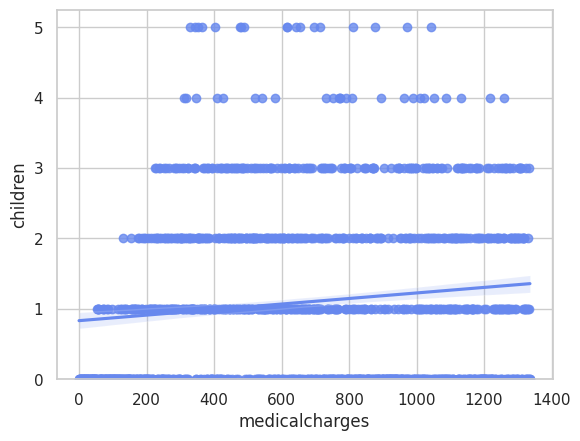

In [54]:
# Type of Relation between children & medicalcharges :Positve_Relation
sns.regplot(x=data["medicalcharges"],y=data["children"])
plt.ylim(0,)

(0.0, 3.15)

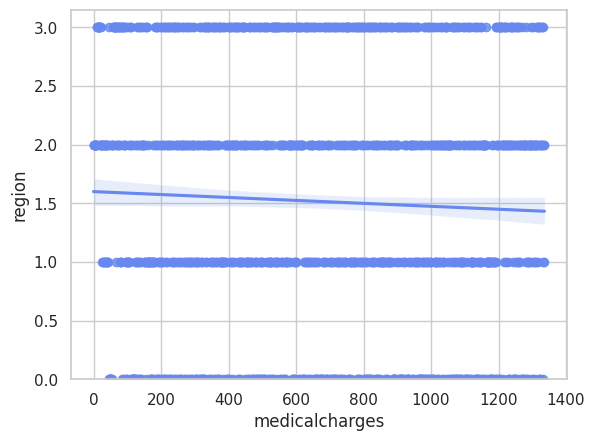

In [55]:
# Type of Relation between region & medicalcharges :Negative_Relation
sns.regplot(x=data["medicalcharges"],y=data["region"])
plt.ylim(0,)

Text(0.5, 1.0, 'Correlation_heatmap_Matrix')

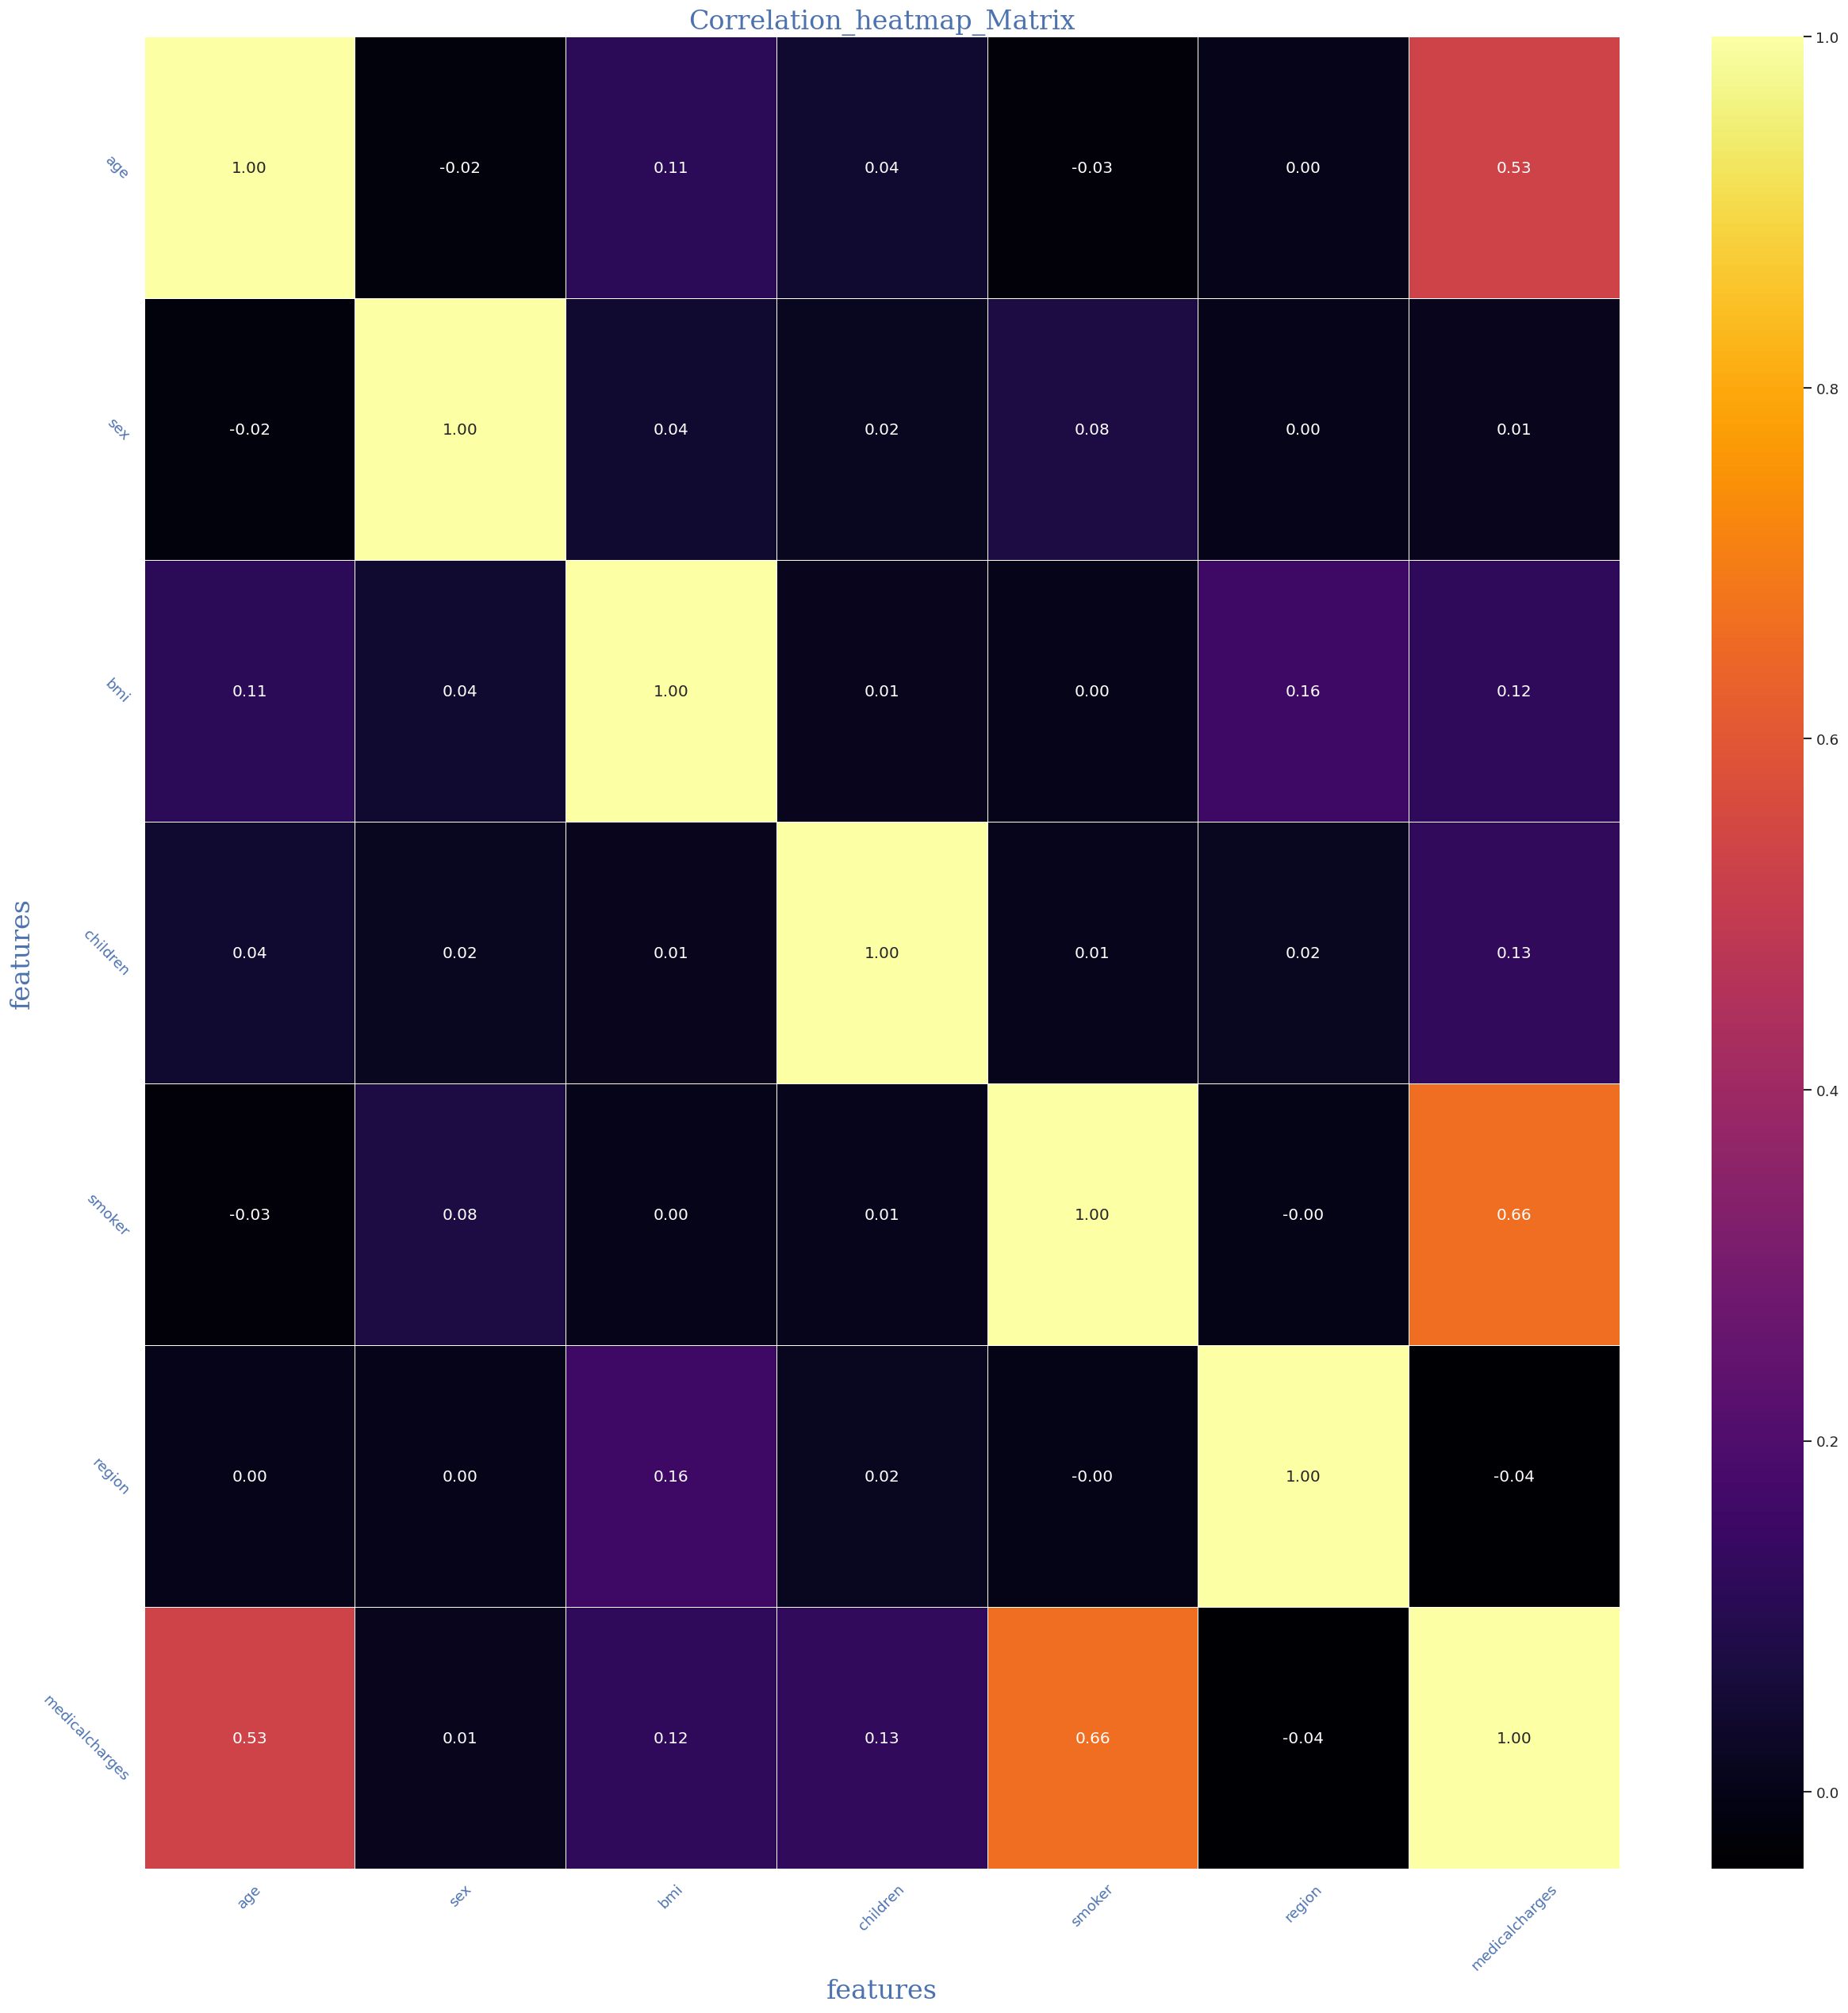

In [56]:
# plot the heatmap:
# plot the heatmap_Correlation_MatRix:
f1={"family":"serif","size":20,"color":"b"}
plt.figure(figsize=(25,25),dpi=120)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.2f",cmap='inferno',linewidths=0.5)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.xlabel("features",fontdict=f1)
plt.ylabel("features",fontdict=f1)
plt.title("Correlation_heatmap_Matrix",fontdict=f1)


In [57]:
features=data.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]:
         if ((x> upper_limit) or (x<low_limit)):
             outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in age feature

Q1 of age --->>> 9.0 

 Q3 of age ---->>> 33.0 

 iqr--->>24.0

 low_limit--->>>-27.0 

  upper_limit--->>> 69.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in sex feature

Q1 of sex --->>> 0.0 

 Q3 of sex ---->>> 1.0 

 iqr--->>1.0

 low_limit--->>>-1.5 

  upper_limit--->>> 2.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in bmi feature

Q1 of bmi --->>> 157.25 

 Q3 of bmi ---->>> 371.75 

 iqr--->>214.5

 low_limit--->>>-164.5 

  upper_limit--->>> 693.5 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

 * -- >> there No outlier in children feature

Q1 of children --->>> 0.0 

 Q3 of children ---->>> 2.0 

 iqr--->>2.0

 low_limit--->>>-3.0 

  upper_limit--->>> 5.0 

 outlier---->>> [] 

 Number of outliers --->>> 0

-------------------------

Ther outlier in this feature smoker

Q1 of sm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


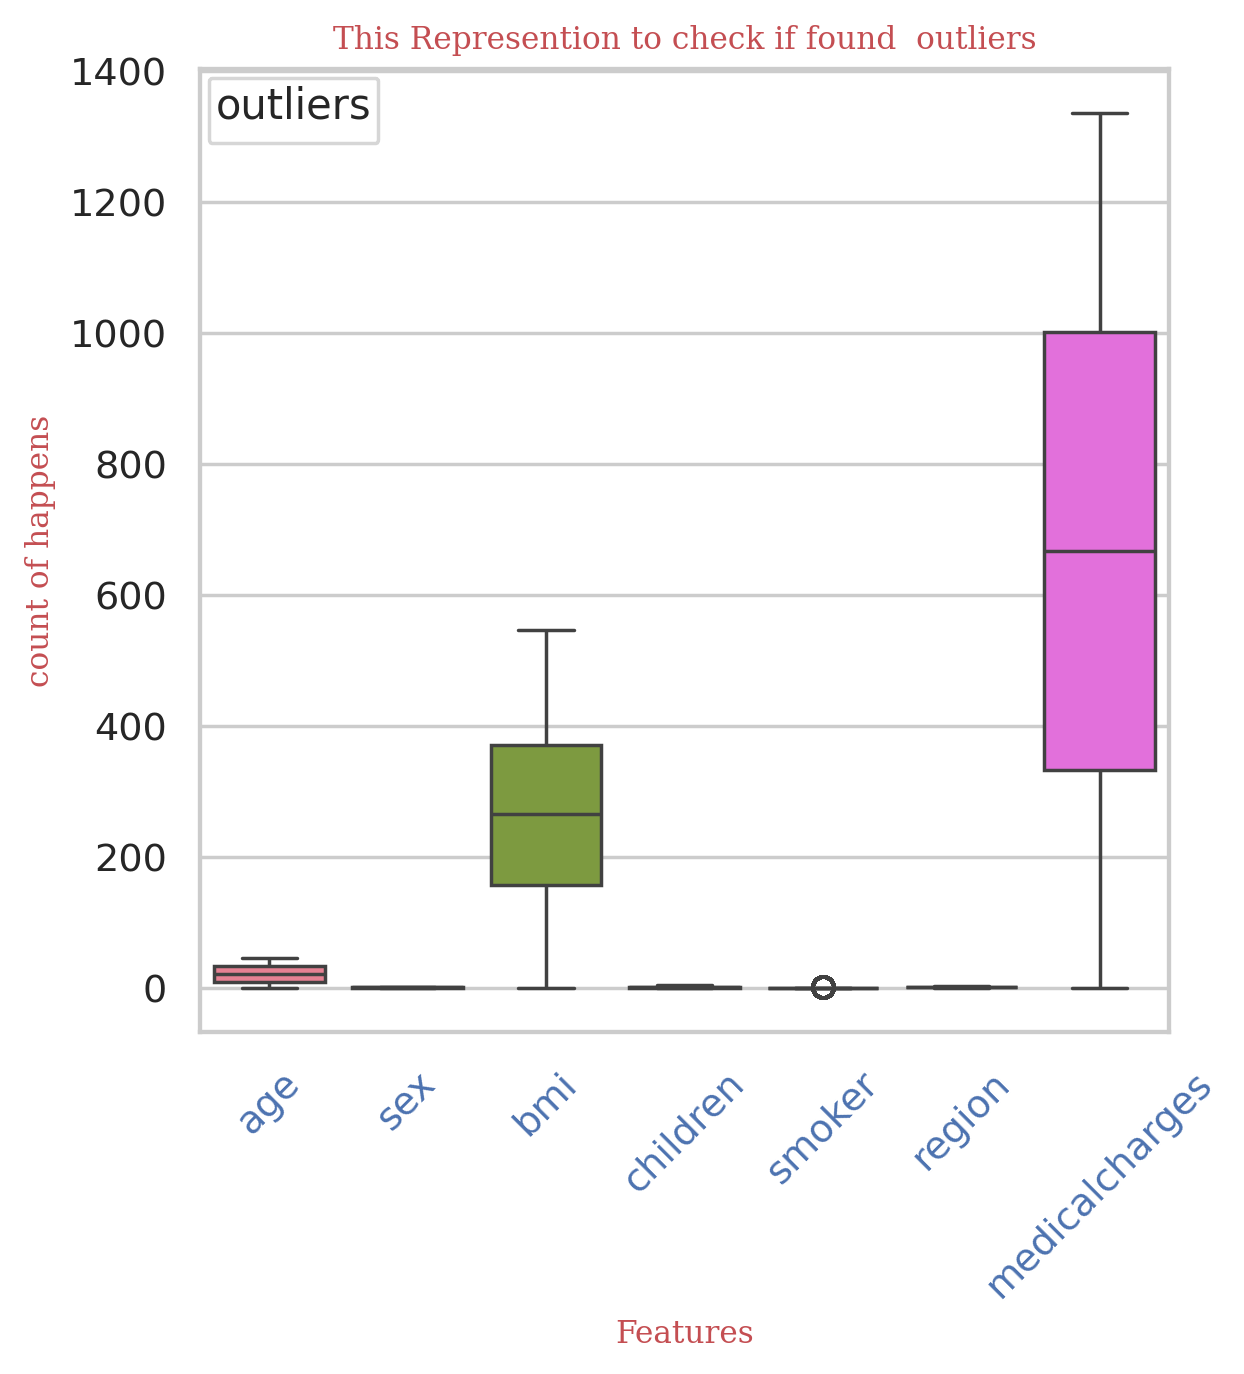

In [58]:
# from this Represention we discover that we found outlier in the  Anematic Feature :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

upper_limit :  1.4158653712317697

lower_limit :  -1.006298854041934

Mean Value :  0.20478325859491778

Median Value :  0.0

1st Standard Deviation :  0.4036940375456173


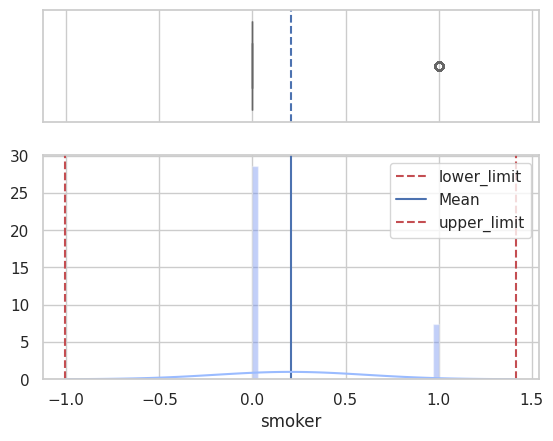

In [59]:
#Another way to calculate outlier on smoker feature:-


from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

mean=data.smoker.mean()
std = data.smoker.std()
median = data.smoker.median()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(x=data["smoker"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(data["smoker"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [60]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=5)
mic.fit(data.drop(columns="medicalcharges").select_dtypes("number").fillna(0),data["medicalcharges"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="medicalcharges").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

## Bulding Models 

In [61]:
# Dictionary of models

RR=Ridge()
parameters=[{'alpha':[0.001,0.1,1,10,100,1000,100000]}]
models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=4,random_state=42),
    "GridentSearchCV":GridSearchCV(RR,parameters,cv=4)
}

In [62]:
for model_name, model in models.items():
    # Fit the model to the training data
    
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    acc = model.score(x_test,y_test)
    rmse = np.sqrt(mse)
    print("*"*50)

    # Print the evaluation metrics for each model
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Error:{rmse}")
    print(f"model_accuracy: {acc*100:0.2f}%")
    print("-"*50)

**************************************************

Model: RandomForestRegressor

Mean Squared Error (MSE): 30869.587816666663

Root Error:175.69743258416347

model_accuracy: 79.31%

--------------------------------------------------

**************************************************

Model: LinearRegression

Mean Squared Error (MSE): 33937.15371269947

Root Error:184.22039439947866

model_accuracy: 77.25%

--------------------------------------------------

**************************************************

Model: DecisionTreeRegressor

Mean Squared Error (MSE): 30708.266719065425

Root Error:175.2377434203757

model_accuracy: 79.42%

--------------------------------------------------

**************************************************

Model: GridentSearchCV

Mean Squared Error (MSE): 33937.147131289734

Root Error:184.22037653660828

model_accuracy: 77.25%

--------------------------------------------------


In [63]:
# Explain the prediction for DecisionTree_model :
DT=models["DecisionTreeRegressor"]
tree_representation = tree.export_text(DT)
print(tree_representation)

|--- feature_4 <= 0.50

|   |--- feature_0 <= 24.50

|   |   |--- feature_0 <= 4.50

|   |   |   |--- feature_3 <= 0.50

|   |   |   |   |--- value: [104.02]

|   |   |   |--- feature_3 >  0.50

|   |   |   |   |--- value: [294.94]

|   |   |--- feature_0 >  4.50

|   |   |   |--- feature_0 <= 16.50

|   |   |   |   |--- value: [357.31]

|   |   |   |--- feature_0 >  16.50

|   |   |   |   |--- value: [494.84]

|   |--- feature_0 >  24.50

|   |   |--- feature_0 <= 34.50

|   |   |   |--- feature_0 <= 28.50

|   |   |   |   |--- value: [632.79]

|   |   |   |--- feature_0 >  28.50

|   |   |   |   |--- value: [730.40]

|   |   |--- feature_0 >  34.50

|   |   |   |--- feature_0 <= 40.50

|   |   |   |   |--- value: [833.81]

|   |   |   |--- feature_0 >  40.50

|   |   |   |   |--- value: [956.72]

|--- feature_4 >  0.50

|   |--- feature_2 <= 254.00

|   |   |--- feature_0 <= 23.00

|   |   |   |--- feature_2 <= 109.50

|   |   |   |   |--- value: [994.26]

|   |   |   |--- feature_2 

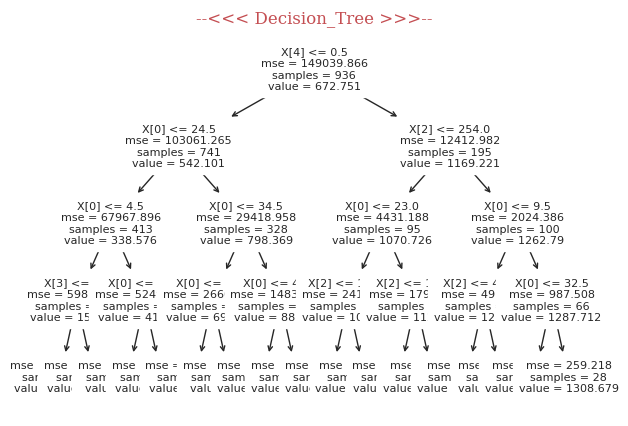

In [64]:
#plot the tree :

# if i want to plot tree:

f={"color":"r","family":"serif","size":12}
plt.figure(figsize=(7,5),dpi=100) 
tree.plot_tree(DT,fontsize=8,)
plt.title("--<<< Decision_Tree >>>--",fontdict=f)
plt.show()

In [65]:
# save and load Decisiontree Model :

# Save the model :

from joblib import dump, load

# Save the model
dump(DT, 'DT.joblib')

# Load the model
model = load('DT.joblib')

## End the Project :

* in the End ,  If you like my notebook  Upvote me ,thanks

* Devloper : AbdlRahamn Gameel Ahmed Hebishy

* Kaggle : https://www.kaggle.com/abdalrhamnhebishy 